Basics of Flask:

In [ ]:
#1. Create a Flask app that displays "Hello, World!" on the homepage.
from flask import Flask

app = Flask(__name__)

@app.route('/home')
def hello():
    return "Hello world!"

if __name__ == '__main__':
    app.run(debug = True)
    

In [ ]:
#2. Build a Flask app with static HTML pages and navigate between them.
from flask import Flask, request , render_template , jsonify

app = Flask(__name__)

@app.route('/home')                                #use this code in html to navigate between the pages
def home():                                       #<form action="http://127.0.0.1:5000/home" method="get">                                     
    return render_template('type.html')             #<button type="submit">HOME</button>         
                                                       # </form>
@app.route('/meditation')
def meditation():
    return render_template('meditation.html')

@app.route('/physical_exercise')
def physical_excise():
    return render_template('physical_exercise.html')

if __name__ == '__main__':
    app.run(debug = True)

Home page

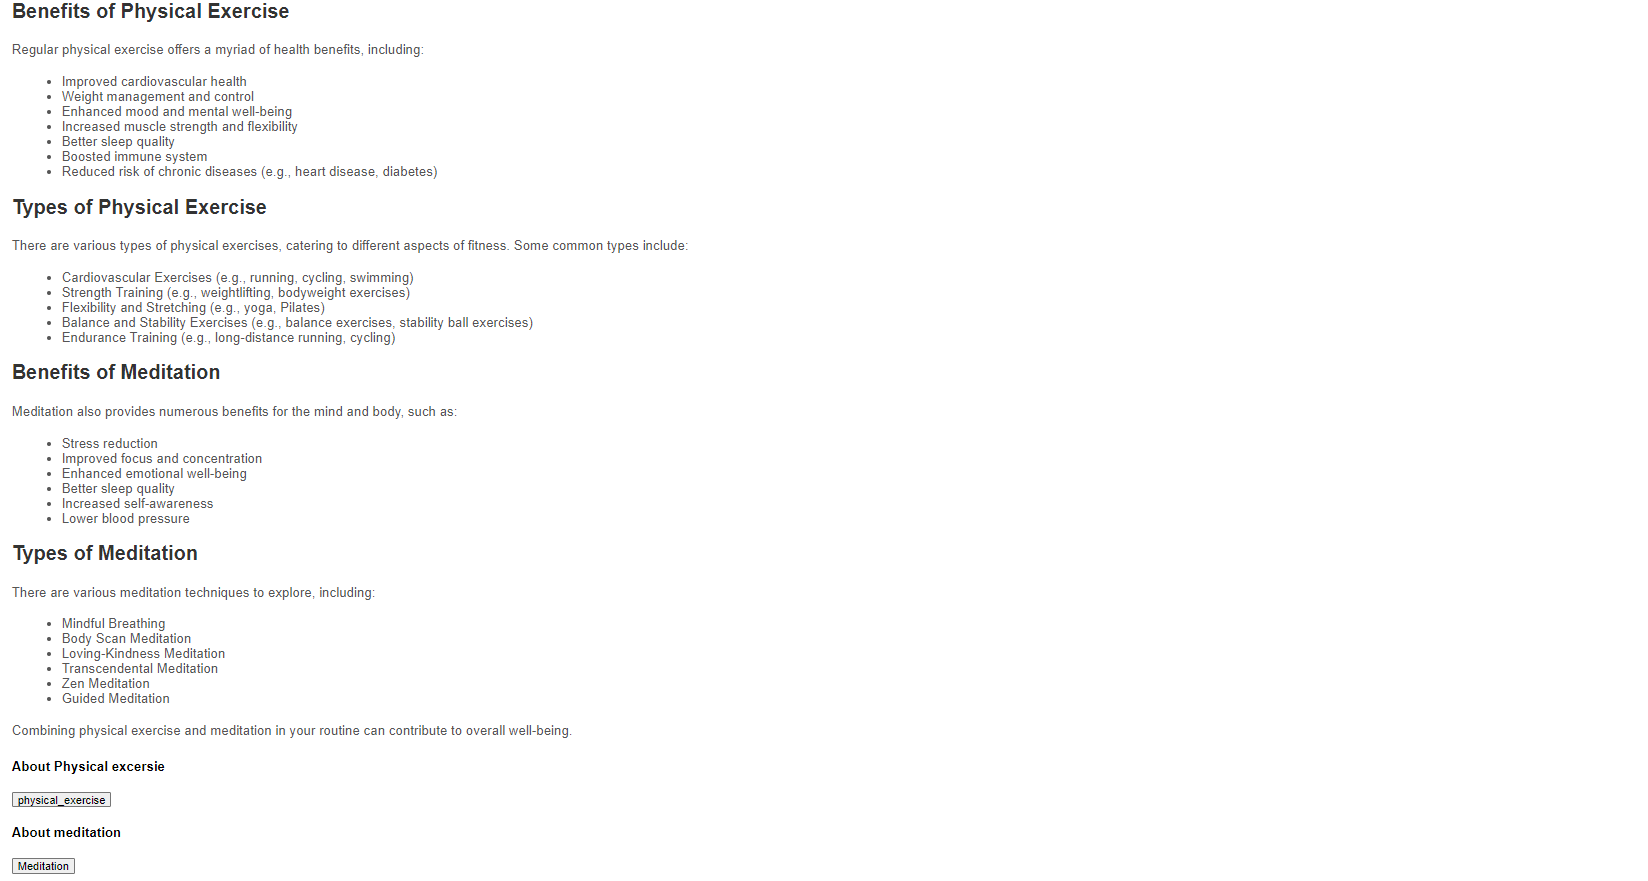

Physical Exercise

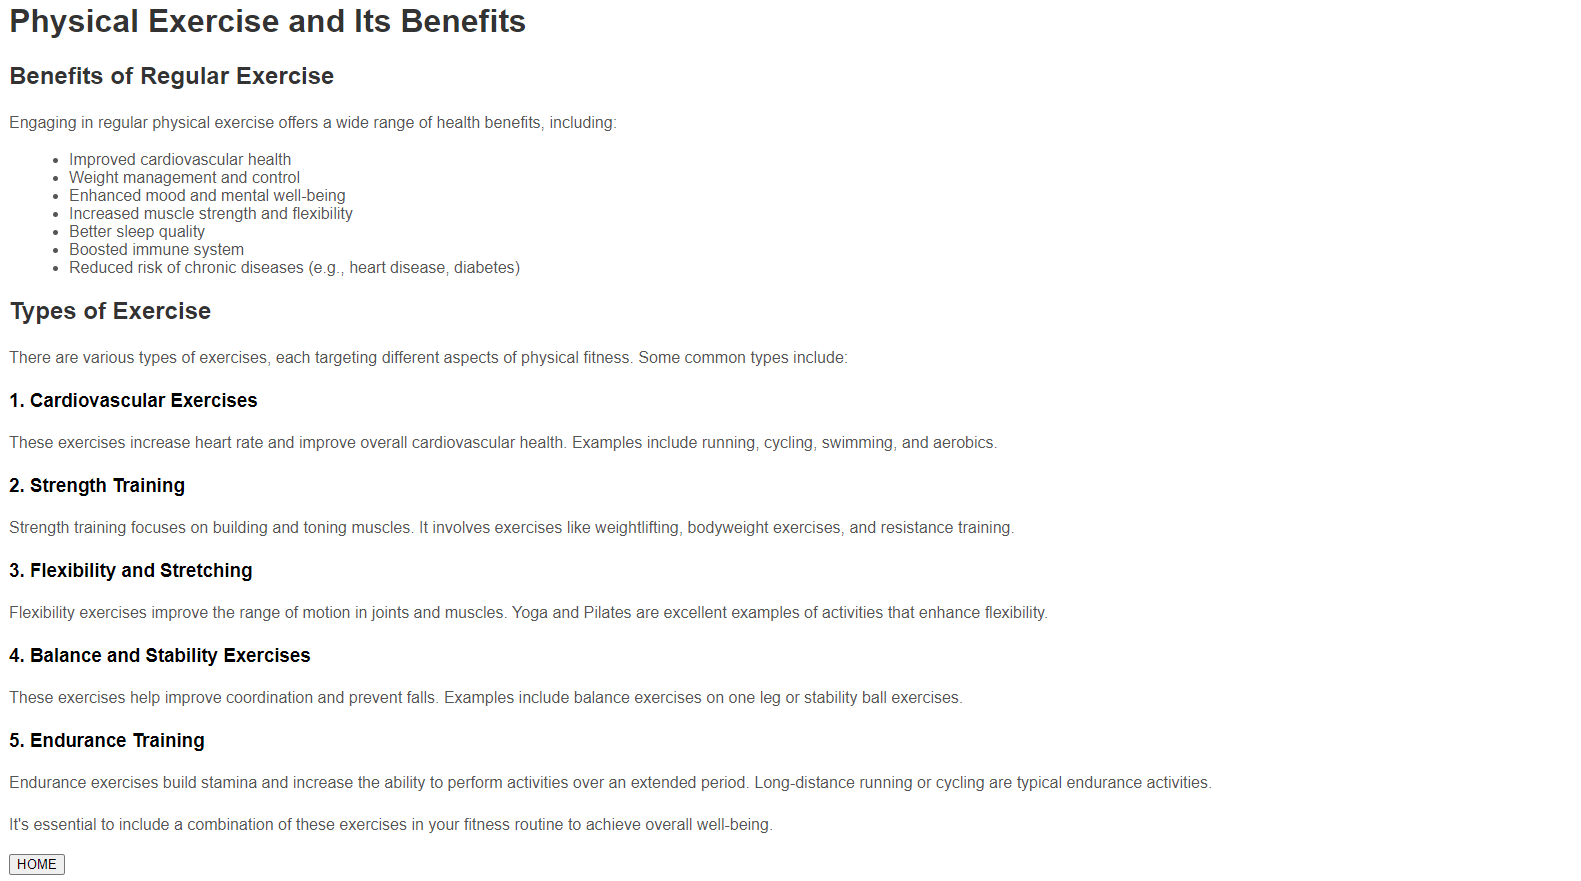

In [1]:
#3. Develop a Flask app that uses URL parameters to display dynamic content.
from flask import Flask, request , render_template ,redirect

app = Flask(__name__)

@app.route('/home')
def home():                                                  #Panda search 
    return render_template('search.html')

@app.route('/search')
def search():
    # Access form data using request.form
    sea = request.args.get('name')
    kp =  f'https://www.google.com/search?q={sea}&rlz=1C1CHBF_en-GBIN1082IN1082&oq=youtube&gs_lcrp=EgZjaHJvbWUqBwgAEAAYjwIyBwgAEAAYjwIyEggBEC4YJxjHARjRAxiABBiKBTINCAIQABiDARixAxiABDINCAMQABiDARixAxiABDIGCAQQRRg8MgYIBRBFGDwyBggGEEUYPDIGCAcQRRg80gEIMzQ5NWowajeoAgCwAgA&sourceid=chrome&ie=UTF-8'
    return redirect(kp)
    
if __name__ == '__main__':
    app.run(debug=True)

home page 

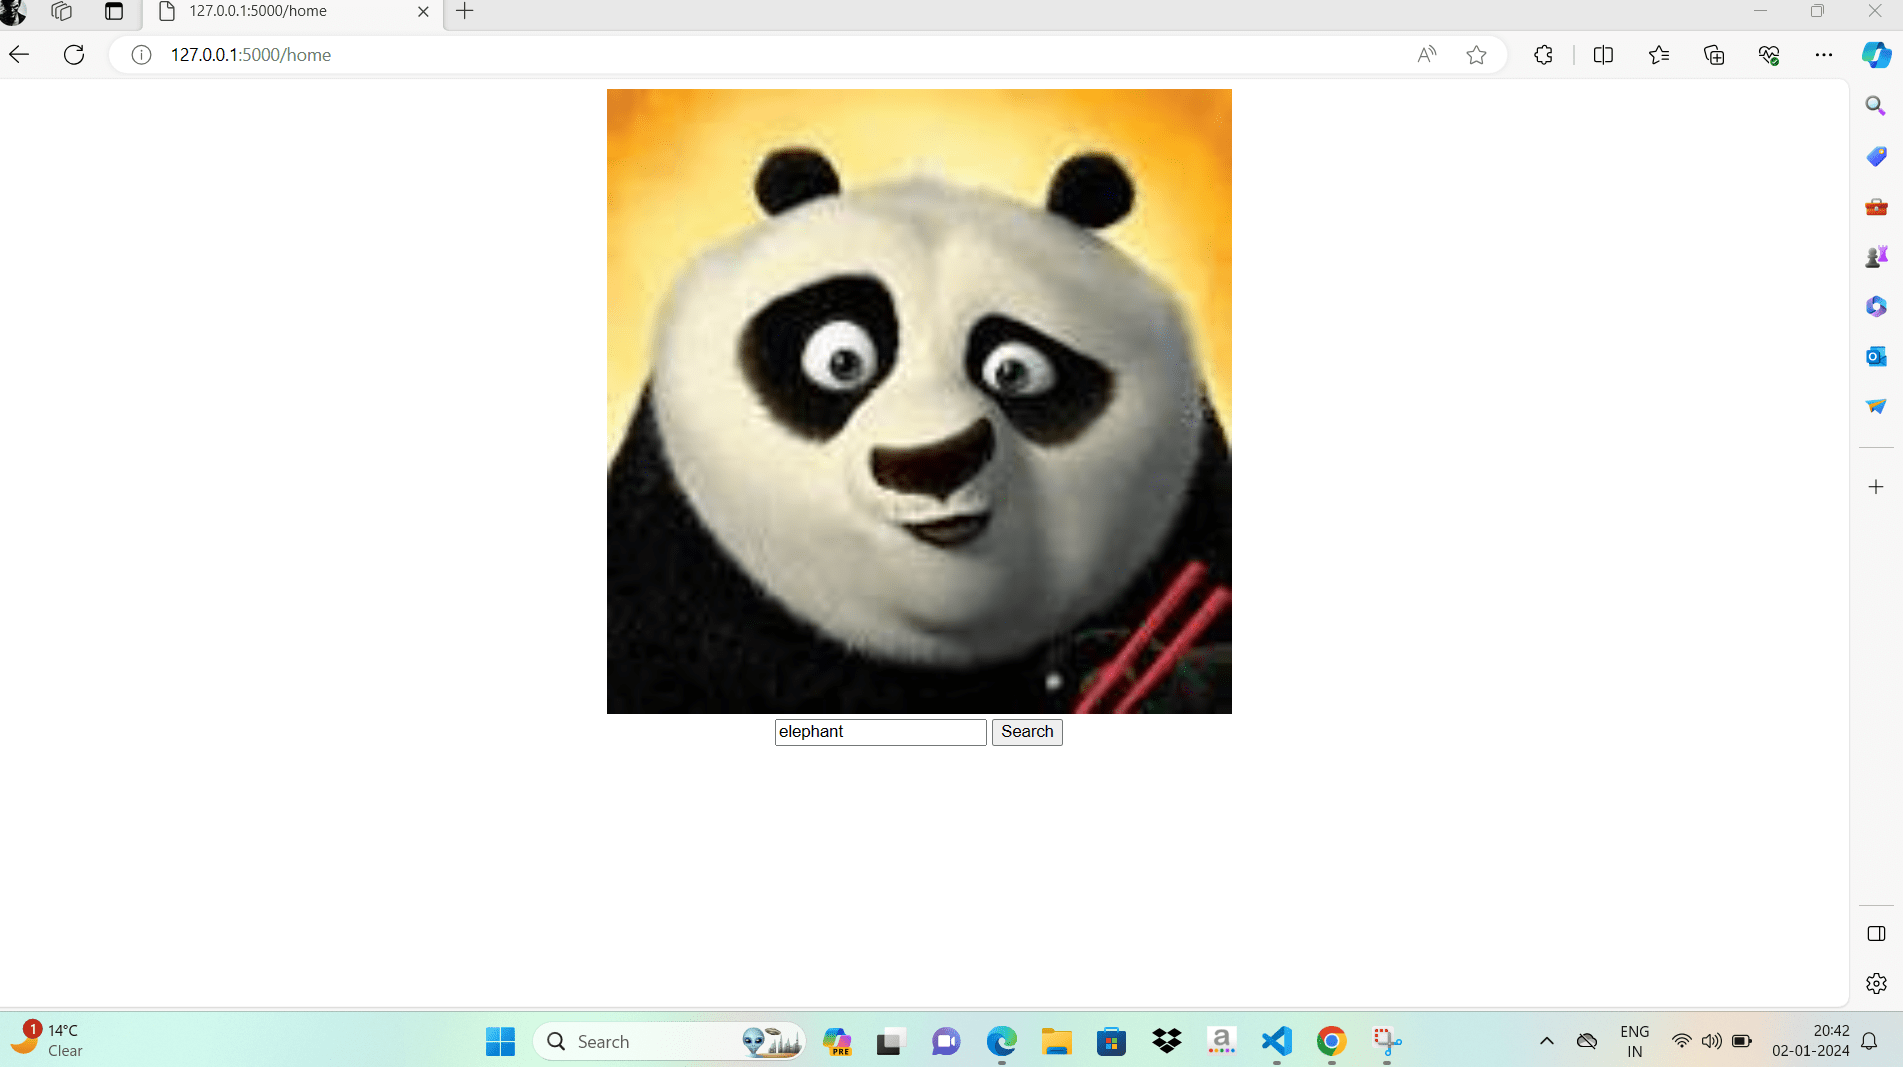

In [ ]:
#4. Create a Flask app with a form that accepts user input and displays it.
from flask import Flask, request , render_template ,redirect

app = Flask(__name__)

@app.route('/home')
def home():
    return render_template('index.html')

@app.route('/disp', methods=['POST'])                       #use this html code to navigate 
def search():                                               #<form action="http://127.0.0.1:5000//disp" method="post">
    # Access form data using request.form                    
    firstName = request.form.get('firstName')                #to jump the disp url
    lastName = request.form.get('lastName')
    email = request.form.get('email')
    age = request.form.get('age')

    p  = f"Name: {firstName} {lastName}<br>Email: {email}<br>Age: {age}"
    return p
    
if __name__ == '__main__':
    app.run(debug=True)

Form

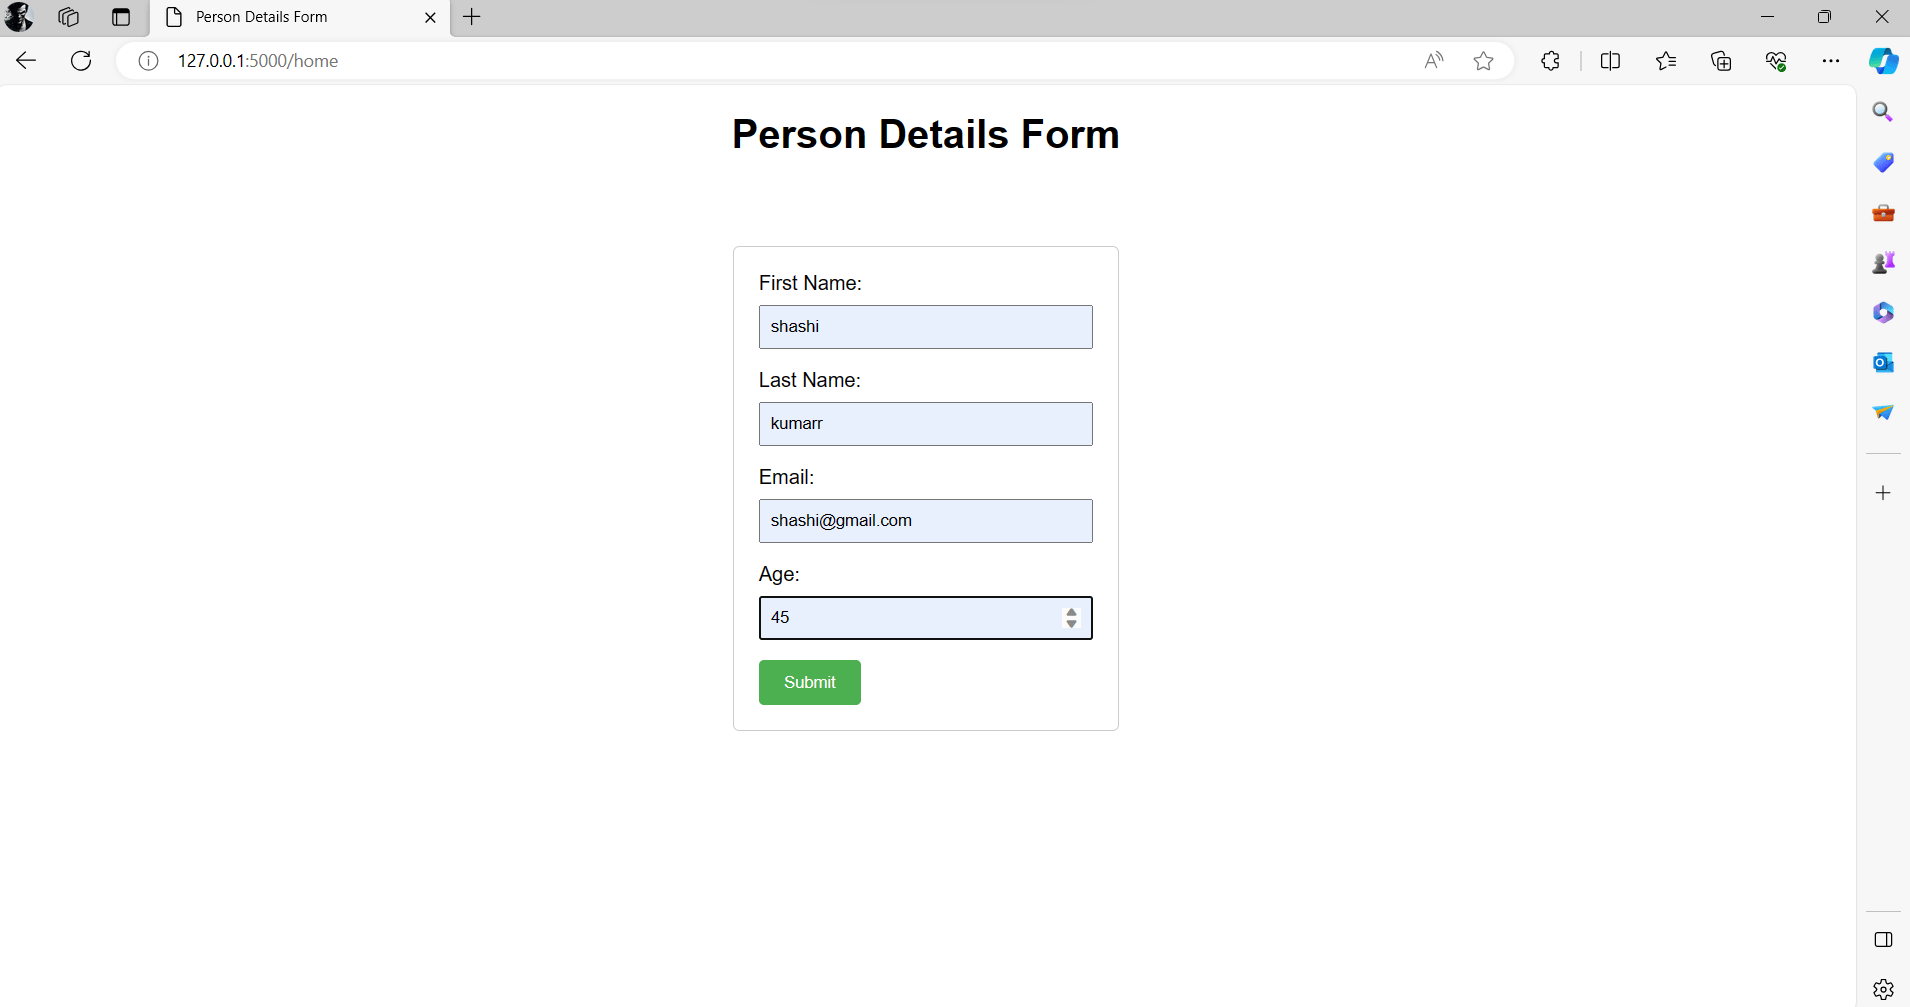

After filling the form

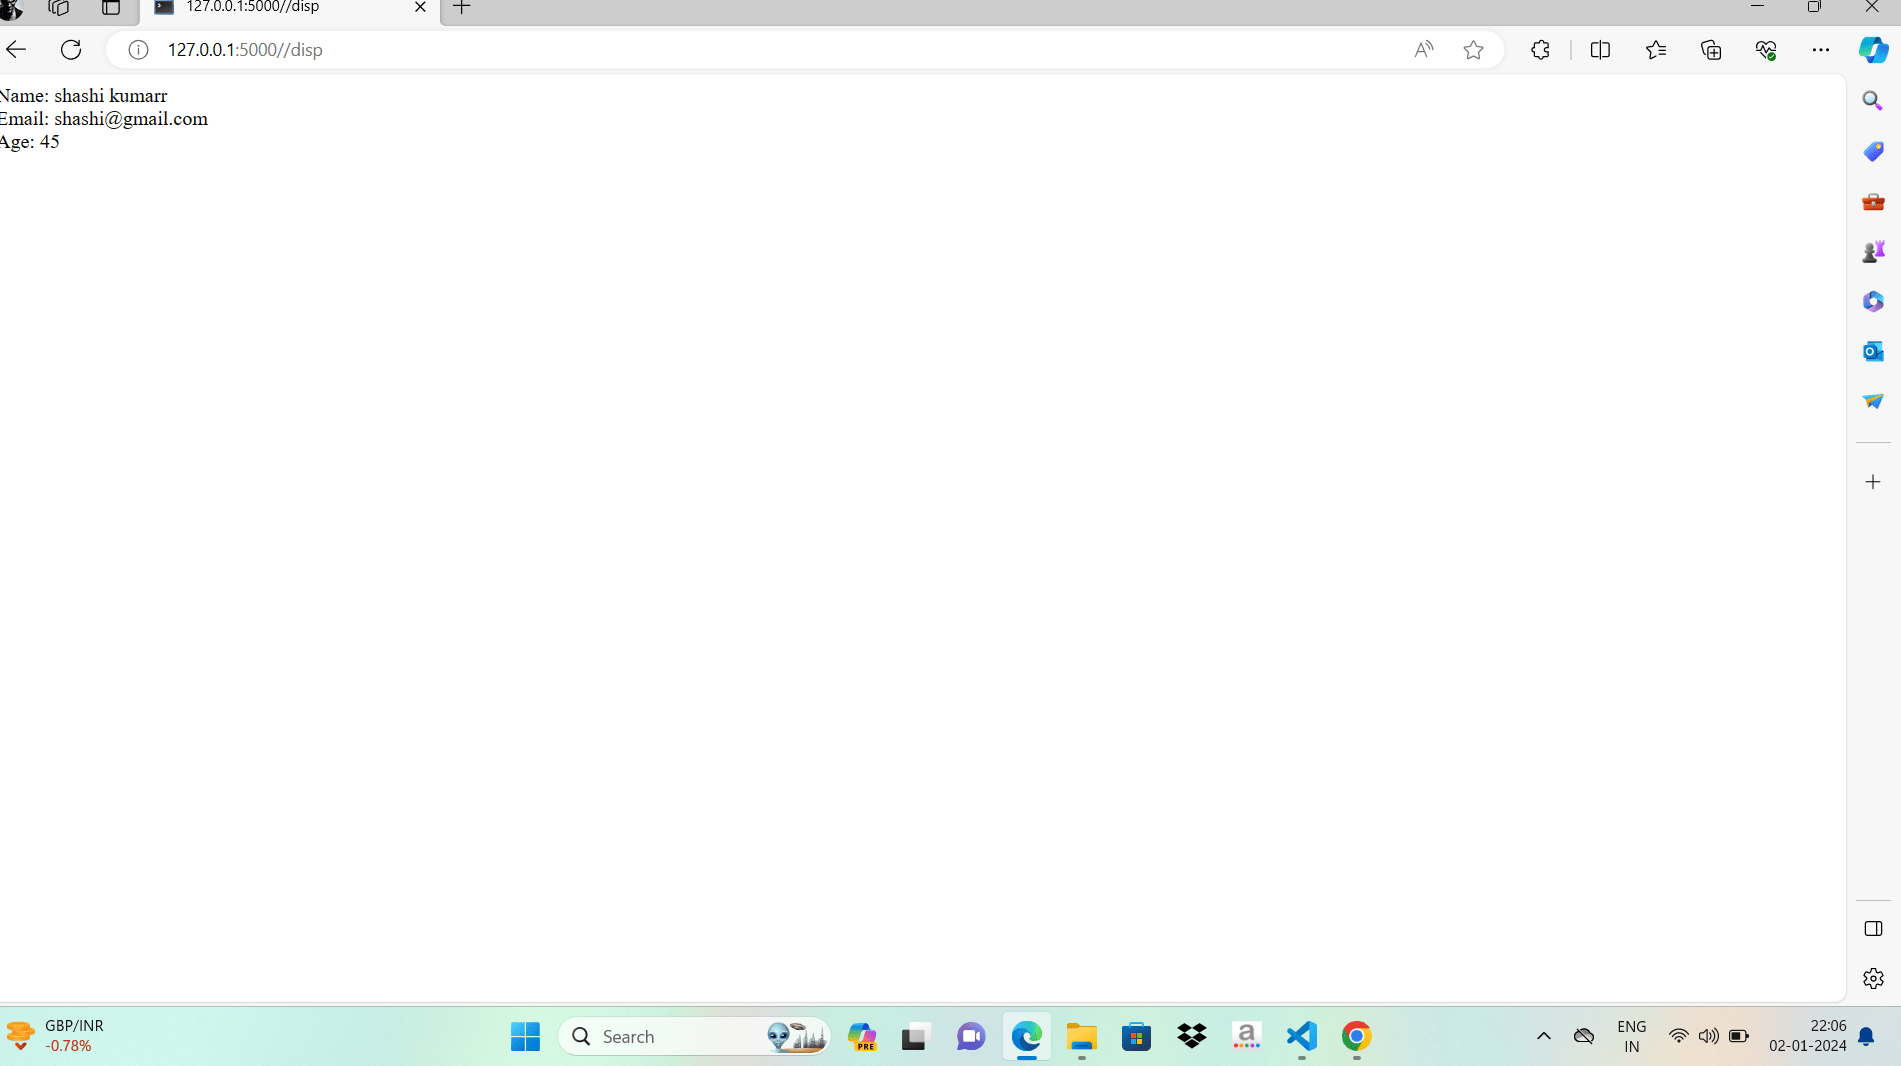

In [5]:
#5. Implement user sessions in a Flask app to store and display user-specific data.
#pip install Flask Flask-Session Flask-Login ---> install first

from flask import Flask,request,session,redirect,render_template

app = Flask(__name__)

app.secret_key = 'your_secret_key'

@app.route('/log')
def log1():
    return render_template('login.html')

@app.route('/signup',methods = ['GET','POST'])
def singn():
    return render_template('signup.html')

@app.route('/home',methods = ['GET','POST'])
def profile():
    username = session.get('username','Guest') #username if exist otherwise guest 
    return render_template('home.html',username=username)

@app.route('/logout',methods = ['GET','PoST'])
def logo():
    session.pop('username',None)        #remove username from the session
    return render_template('login.html')

@app.route('/login', methods = ['GET','POST'])
def login():
    session["username"] = request.form['username'] 
    return redirect('/home')
                                    #no database is created just store the username in session and display in static
if __name__ == '__main__':          #html university page if no username is present it show guest
    app.run(debug=True)

login page
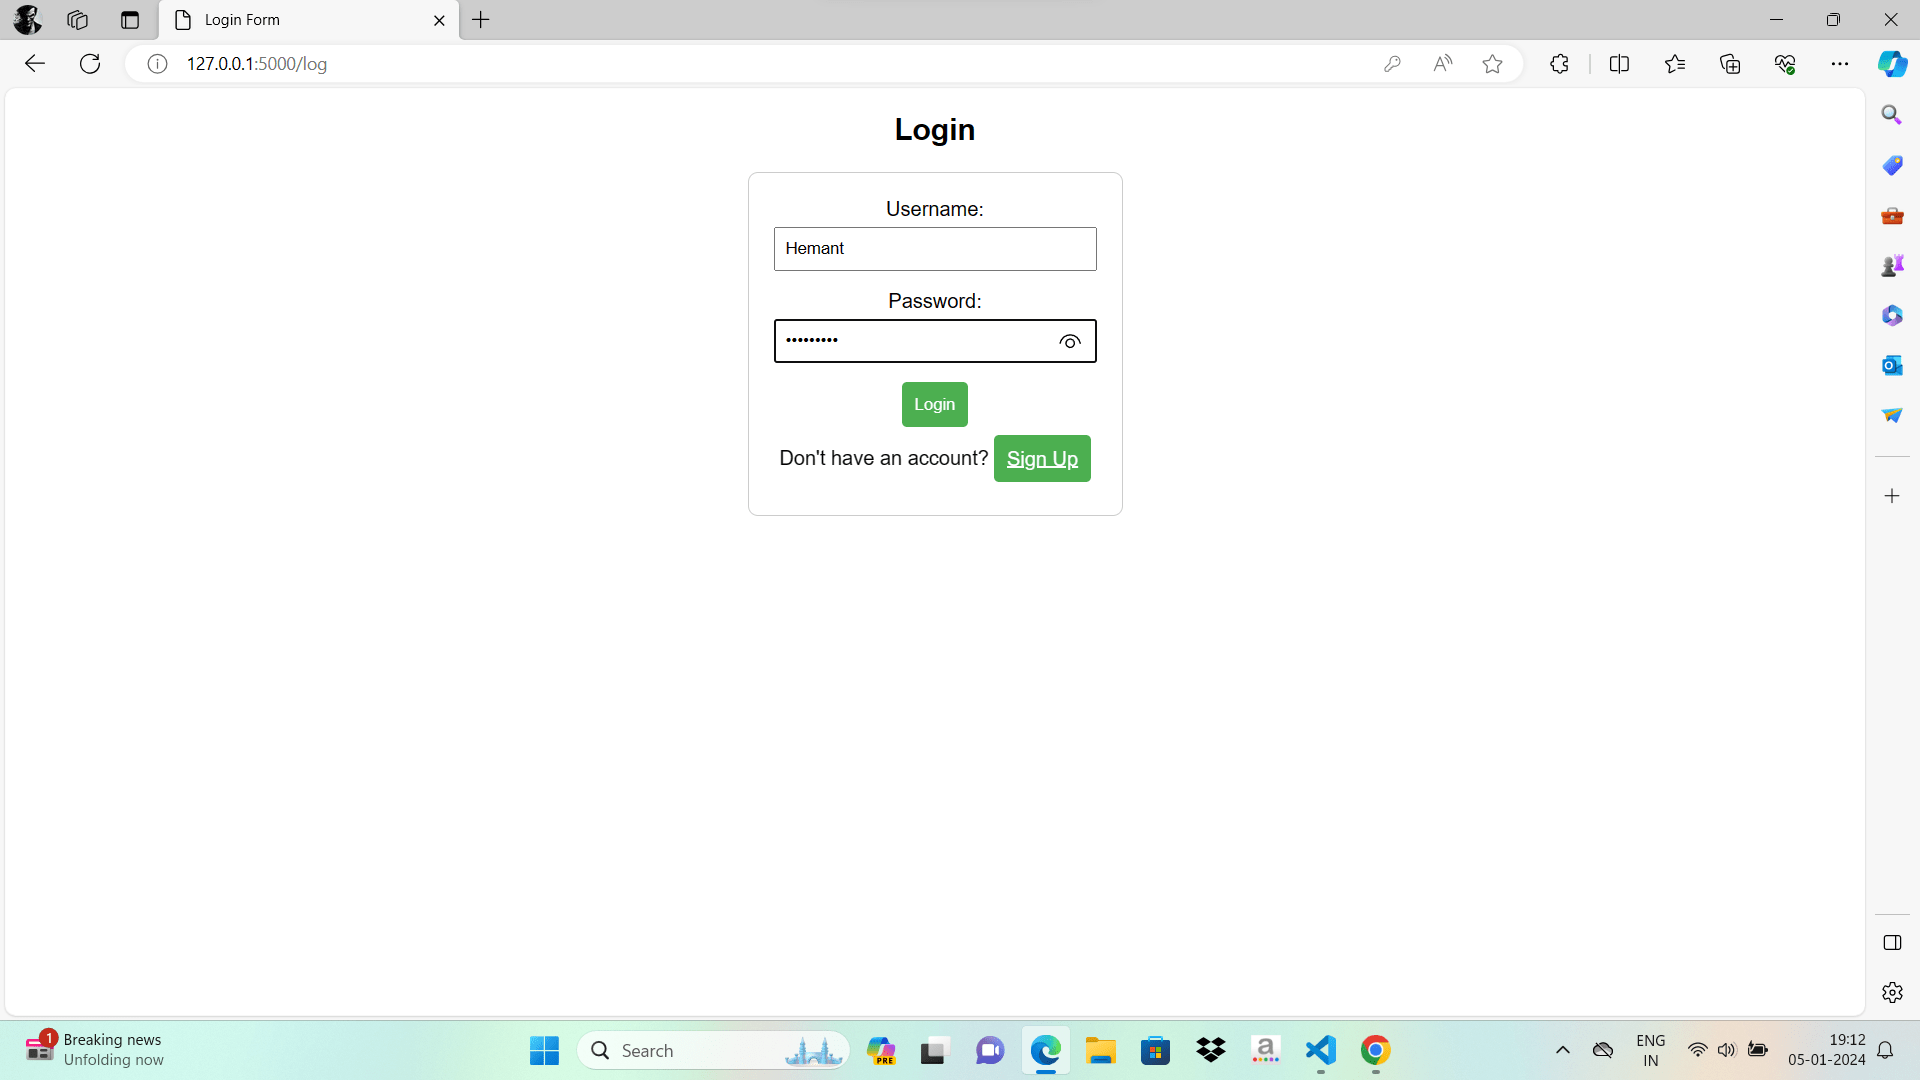

after login page redirect to static university page show username 
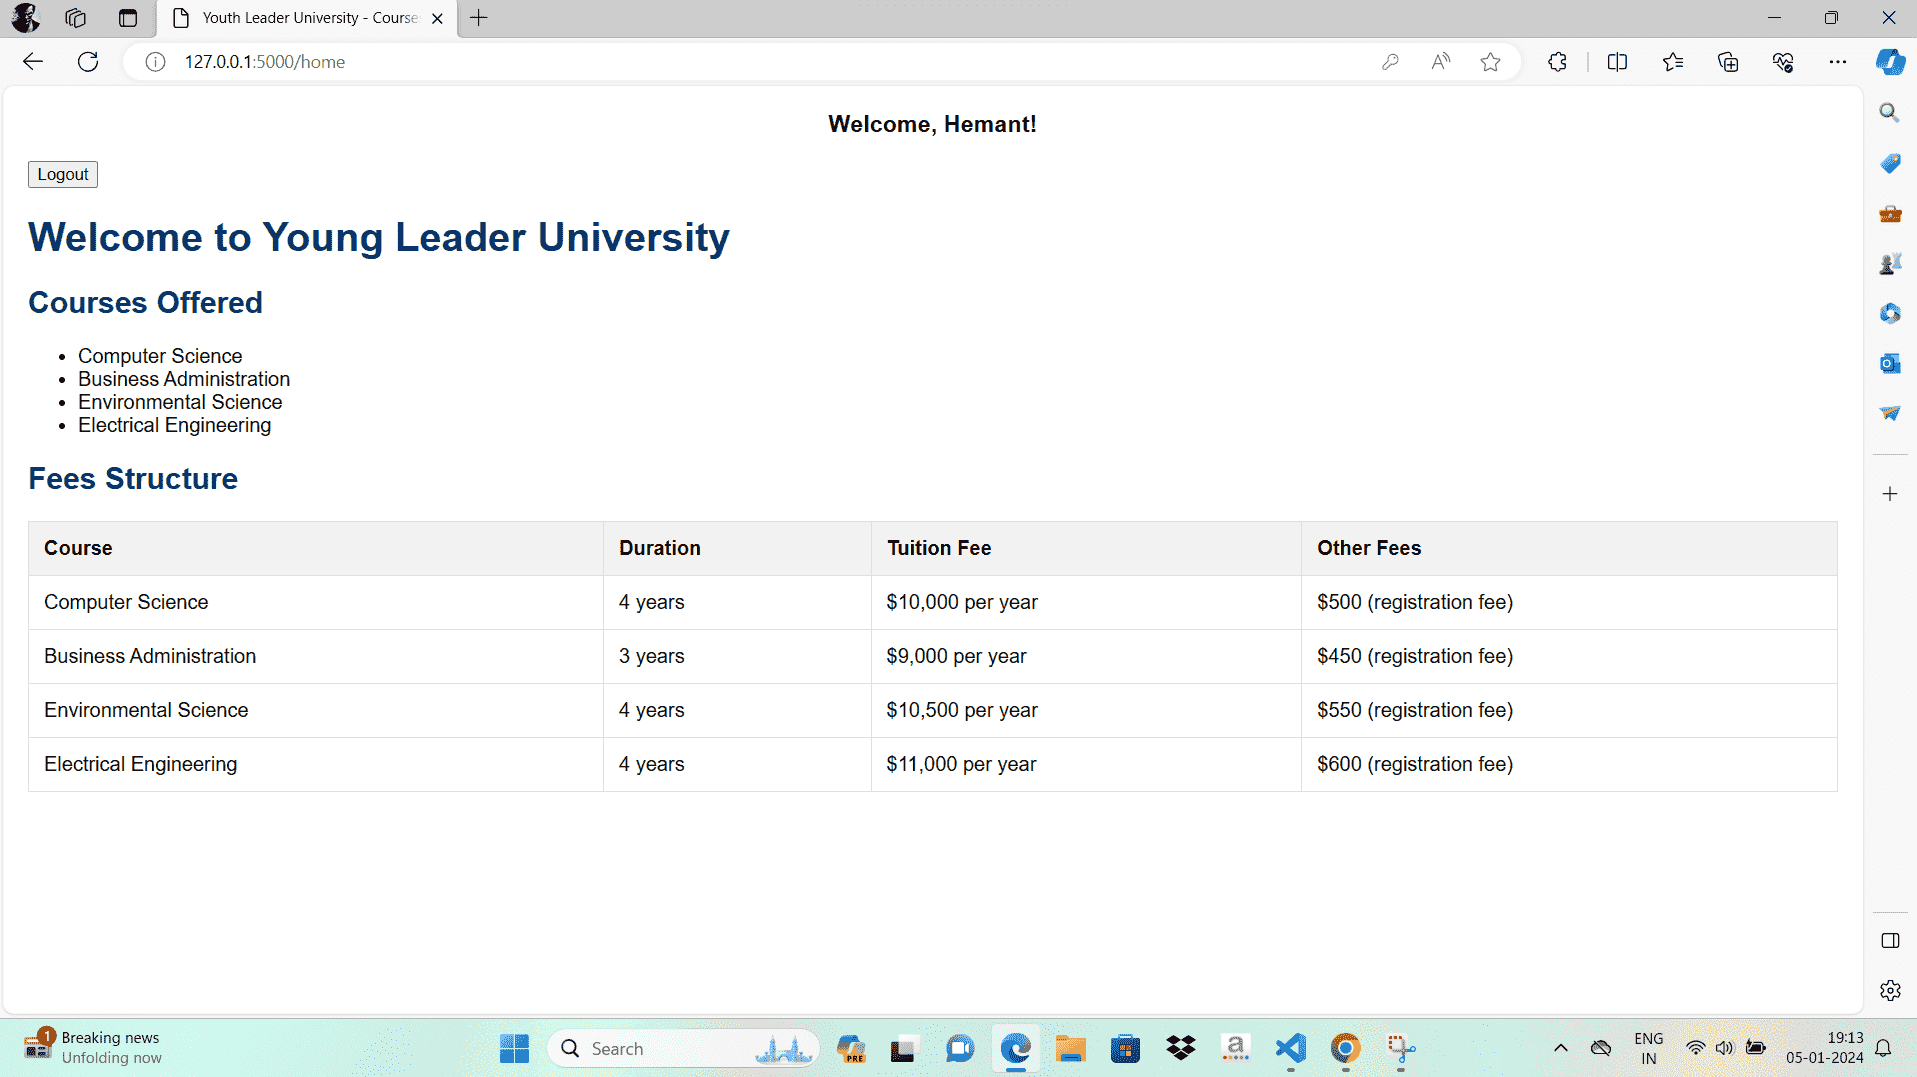

Intermediate Flask Topics:

In [8]:
#6. Build a Flask app that allows users to upload files and display them on the website.
#pip install Flask Flask-WTF ---> install first
from flask import Flask, request, render_template, session, send_from_directory
from werkzeug.utils import secure_filename
import os

app = Flask(__name__)
app.secret_key = 'qwerty'

UPLOAD_FOLDER = 'uploads'
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Ensure the upload folder exists
os.makedirs(app.config['UPLOAD_FOLDER'], exist_ok=True)

@app.route('/')
def upload():
    return render_template('upload.html')

@app.route('/disp', methods=['GET', 'POST'])
def disp():
    # Check if the 'file' key is in the request.files dictionary
    if 'file' not in request.files:
        return render_template('upload.html')

    file = request.files['file']
    if file.filename == '':
        return render_template('upload.html')

    # Save the uploaded file to the 'uploads' folder
    filename = secure_filename(file.filename)
    filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
    file.save(filepath)

    session["filename"] = filename

    # Display the uploaded image on the screen
    return render_template('disp.html', filename=filename)        

# Serve uploaded files directly
@app.route('/uploads/<filename>')
def uploaded_file(filename):
    return send_from_directory(app.config['UPLOAD_FOLDER'], filename)

if __name__ == '__main__':
    app.run(debug=True)

upload page
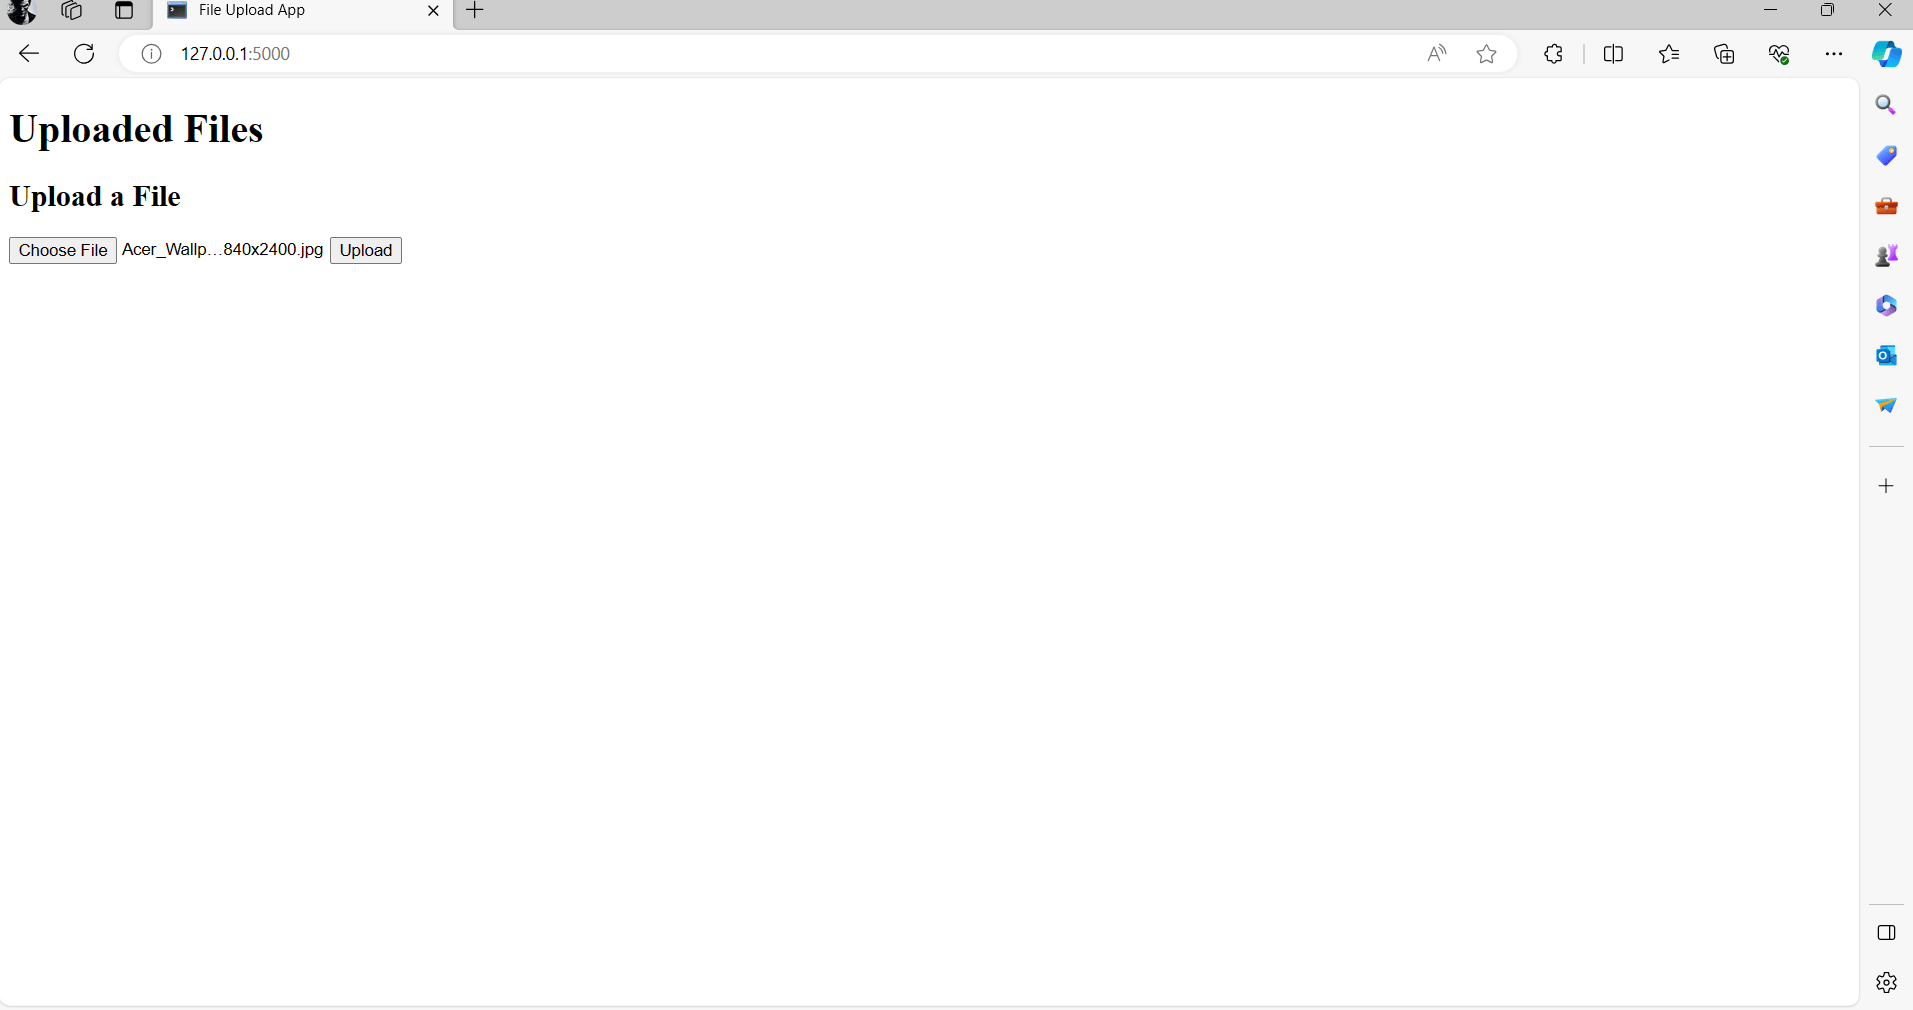

afer upload
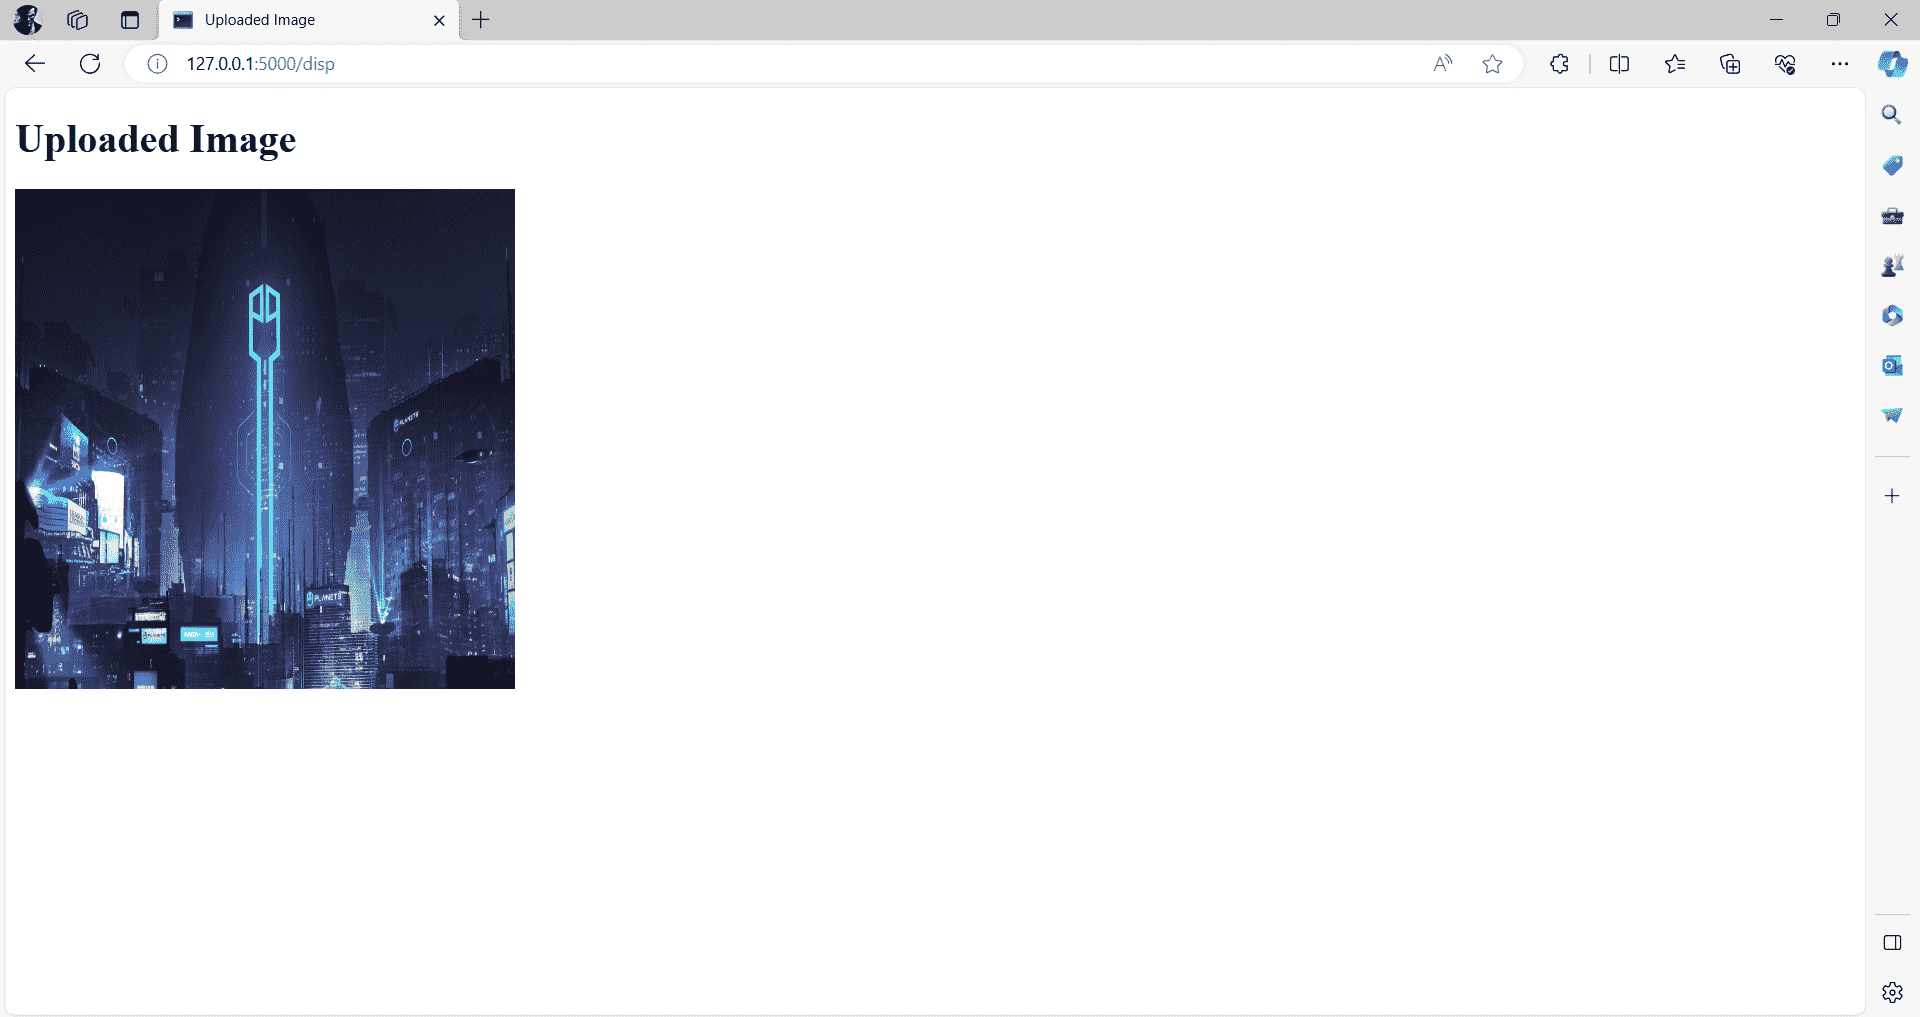

In [ ]:
#7. Integrate a SQLite database with Flask to perform CRUD operations on a list of items.
#to add book and author name in book.db usin sqlite extension in vs code


from flask import Flask, render_template, request, g     #g stand or global object to store data for lifetime of a request
import sqlite3

app = Flask(__name__)
app.config['DATABASE'] = 'book.db'

def get_db():#get_db() is a function that is responsible for getting the SQLite database connection within the context of a request
    db = getattr(g, '_database', None)        #getattr(g, '_database', None): This line attempts to get the value of the attribute 
    if db is None:                                        #named _database from the g object. The getattr function is used here. 
        db = g._database = sqlite3.connect(app.config['DATABASE'])          #If the attribute is not found, it returns None.
    return db

@app.teardown_appcontext     #The provided code is a Flask decorator @app.teardown_appcontext. In Flask, this decorator is used to
def close_connection(exception): # register a function that will be called when the application context is popped, which typically 
    db = getattr(g, '_database', None) #happens at the end of a request. In this case, the function is named close_connection.
    if db is not None:                  #he function will be called regardless of whether an exception occurred.
        db.close()

@app.route('/home', methods=['GET', 'POST'])
def home():
    return render_template('book.html')

@app.route('/insert', methods=['POST'])
def insert():
    name = request.form['title']
    author = request.form['author']
    
    # Use placeholders to prevent SQL injection
    query = 'INSERT INTO Book (Title, Author_Name) VALUES (?, ?)'
    get_db().execute(query, (name, author))
    get_db().commit()
    
    return render_template('show.html')

@app.route('/disp', methods=['GET', 'POST'])
def disp():
    cursor = get_db().execute('SELECT * FROM Book;')
    books = cursor.fetchall()
    return render_template('display_books.html', books=books)



if __name__ == '__main__':
    app.run(debug=True)


Form page to add book title and author name
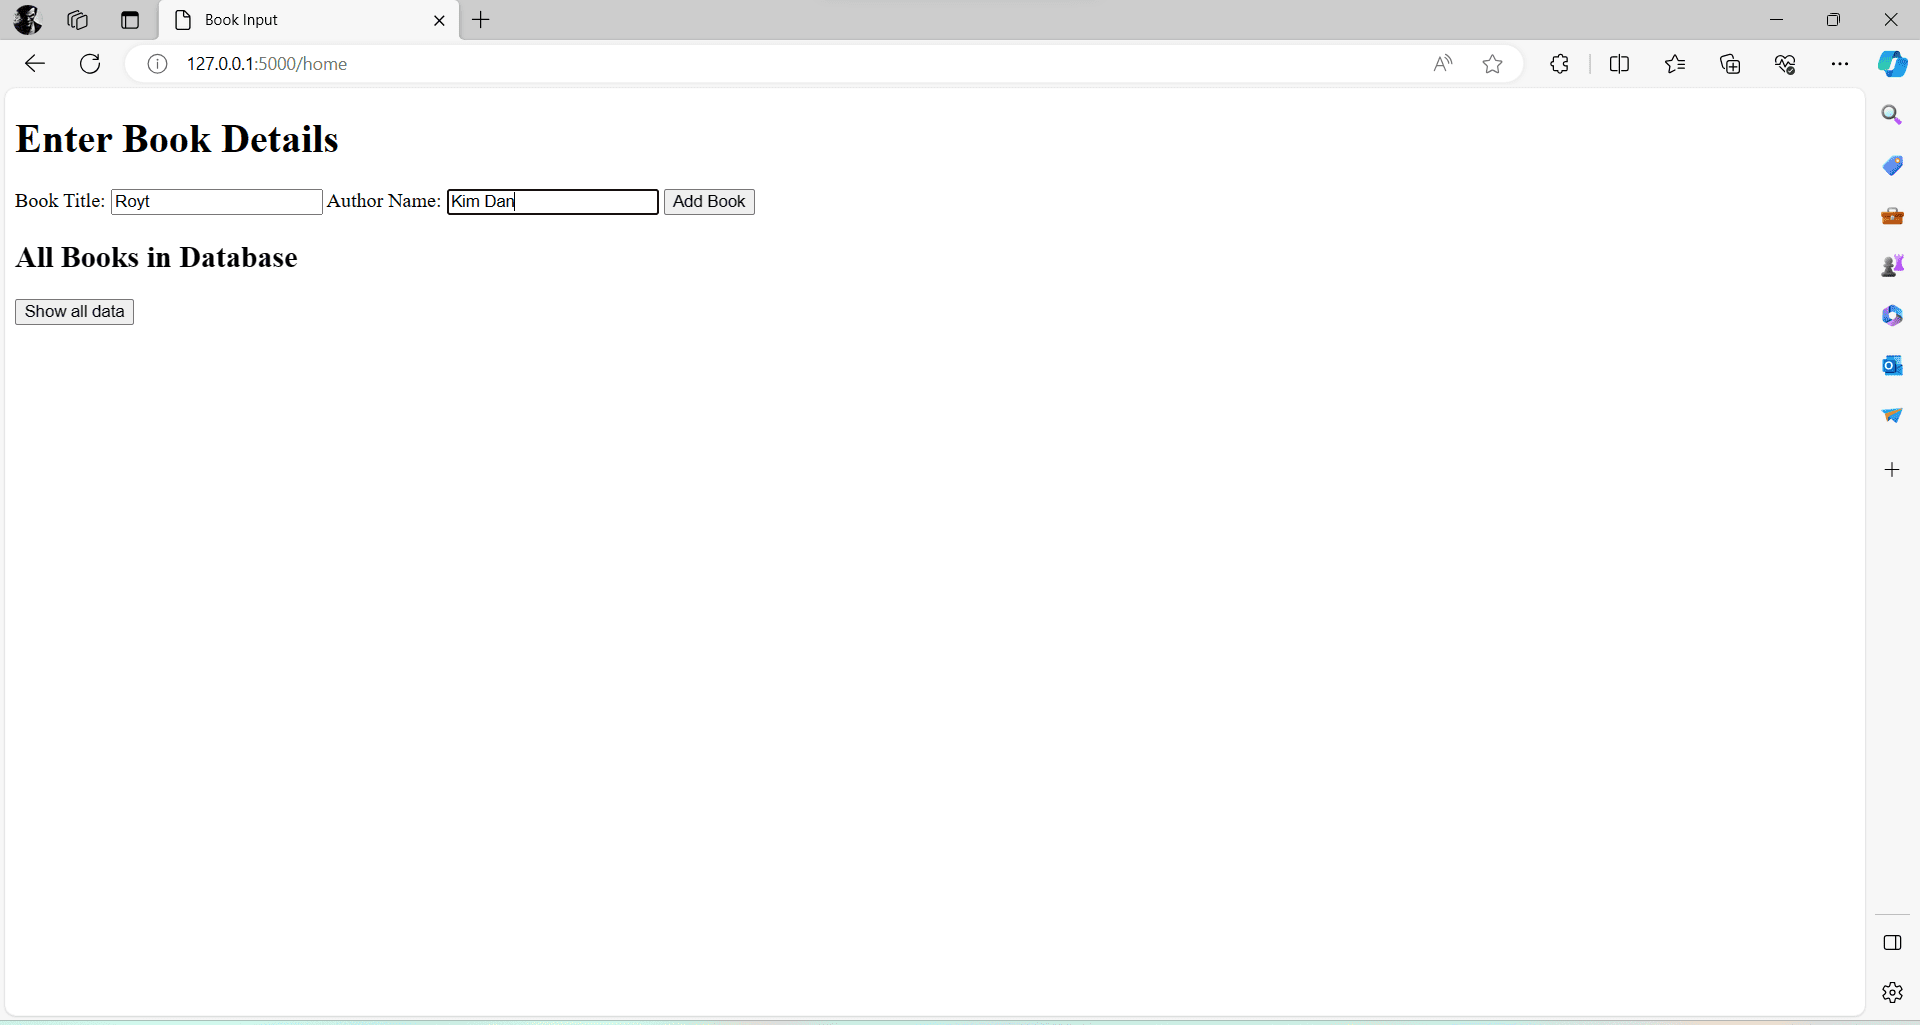

After inserting data 
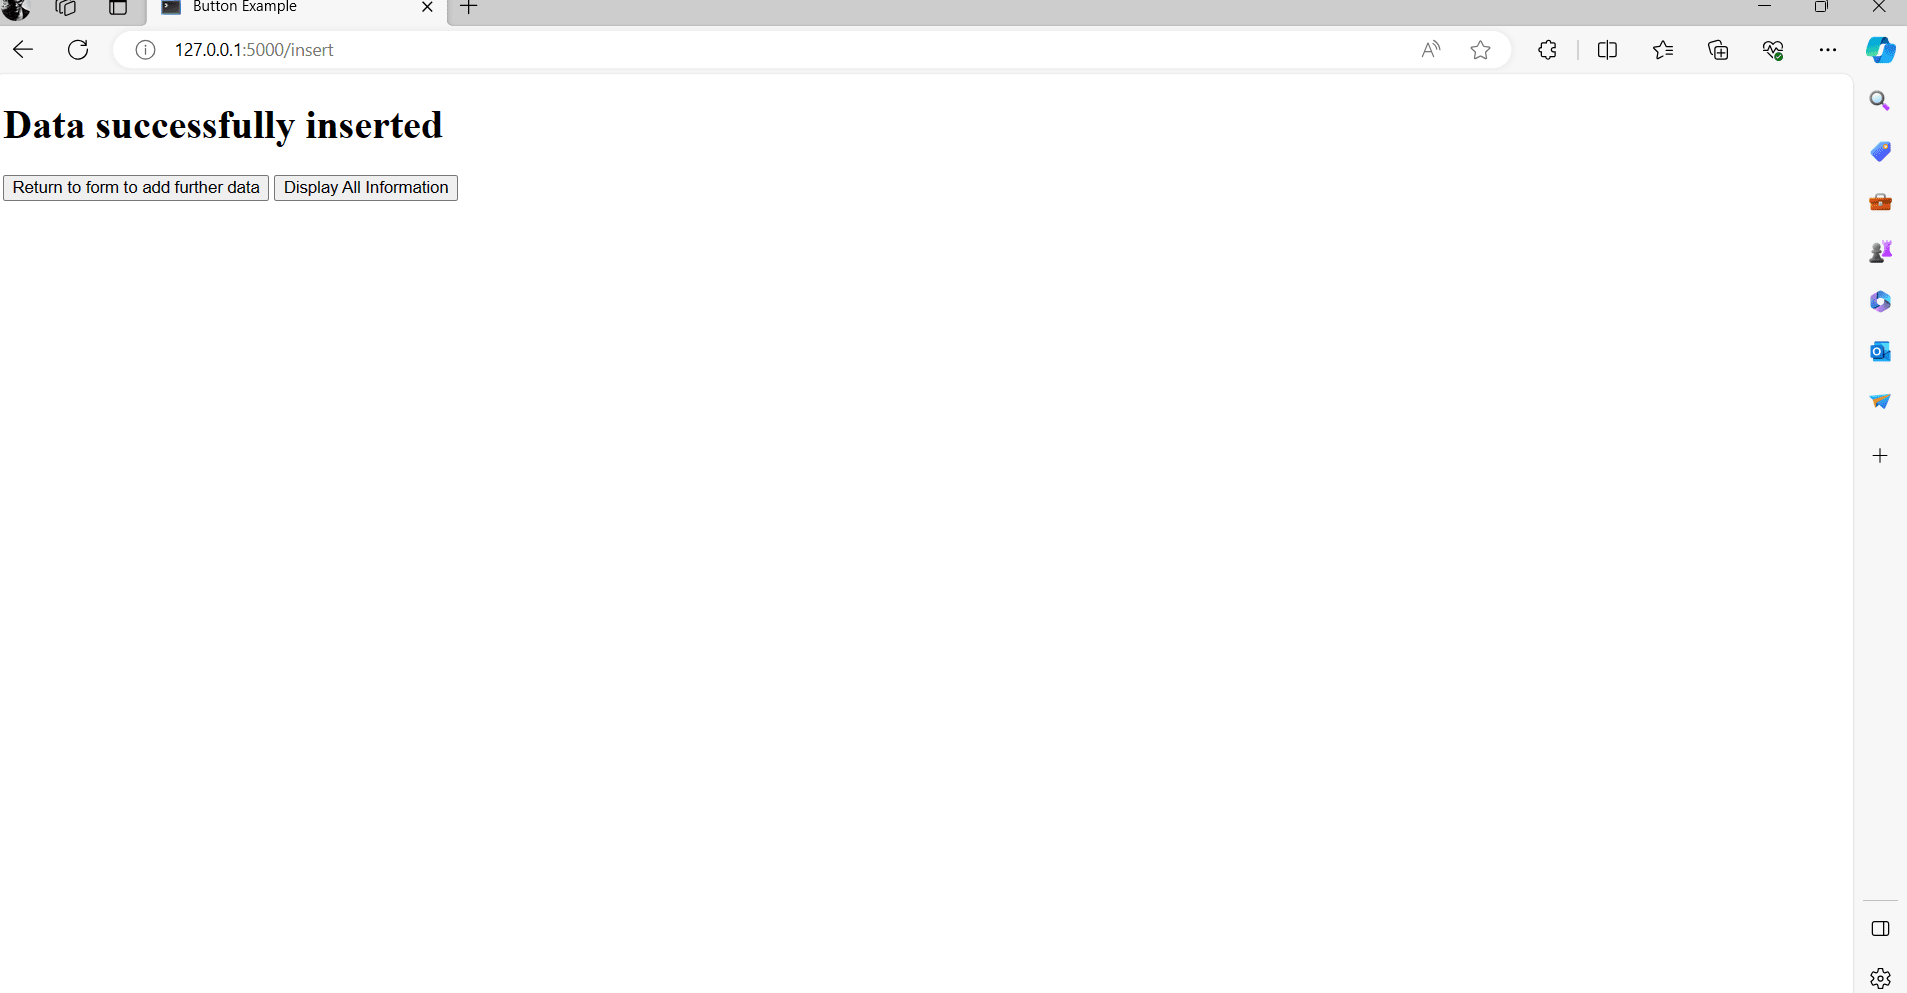

All the data in the table 
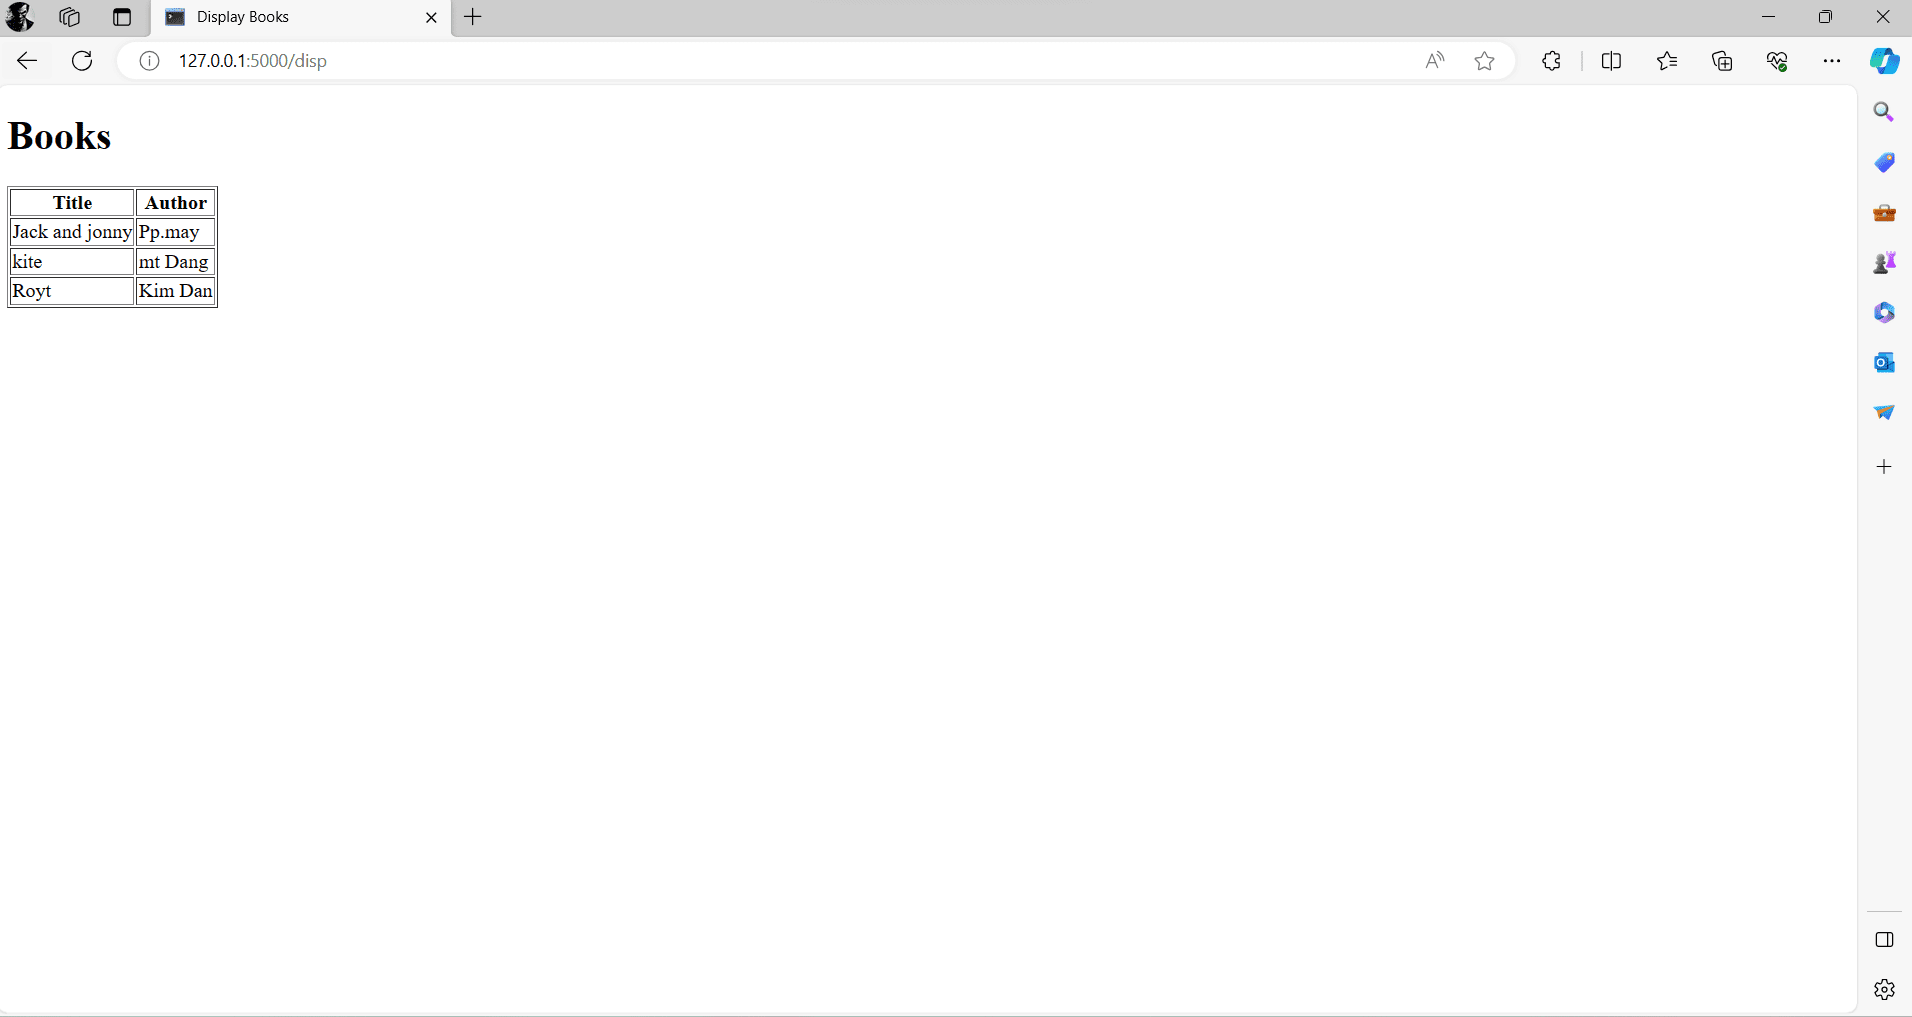

In [ ]:
#8. Implement user authentication and registration in a Flask app using Flask-Login.
from flask import Flask, render_template, request, g ,session                #g stand or global object to store data for lifetime of a request
import sqlite3

app = Flask(__name__)
app.secret_key = 'qwerty'
app.config['DATABASE'] = 'user.db'

def get_db():    #get_db() is a function that is responsible for getting the SQLite database connection within the context of a request
    db = getattr(g, '_database', None)              #getattr(g, '_database', None): This line attempts to get the value of the attribute 
    if db is None:                                        #named _database from the g object. The getattr function is used here. 
        db = g._database = sqlite3.connect(app.config['DATABASE'])          #If the attribute is not found, it returns None.
    return db

@app.teardown_appcontext          #The provided code is a Flask decorator @app.teardown_appcontext. In Flask, this decorator is used to
def close_connection(exception):  # register a function that will be called when the application context is popped, which typically 
    db = getattr(g, '_database', None) #happens at the end of a request. In this case, the function is named close_connection.
    if db is not None:                  #he function will be called regardless of whether an exception occurred.
        db.close()

@app.route('/login', methods=['GET', 'POST'])
def home():
    return render_template('login.html')


@app.route('/log', methods=['POST'])
def checking():
    username = request.form['username']
    password = request.form['password']
    
    # Use placeholders to prevent SQL injection
    query = f'SELECT name, password FROM user WHERE name = ? AND password = ?;'
    result = get_db().execute(query, (username, password)).fetchone()
    get_db().commit()
    if result:
        # Username and password combination exists
        session["username"] = username
        return render_template('home.html',username=username)         #show user name in  static website as user
    else:
        # Username and password combination not found
        popup_script2 = """
        <script>
            alert('User not found!'); 
            window.location.href = '/login';  // Redirect to the login page
        </script>
        """
        return popup_script2




@app.route('/signup', methods=['GET', 'POST'])
def disp():
    username = request.form['username']
    email = request.form['email']
    password = request.form['password']
    query = f'SELECT name, password FROM user WHERE name = ? AND password = ?;'
    result = get_db().execute(query, (username, password)).fetchone()
    get_db().commit()

    if result:
        # Username and password combination exists
      

        # Display a popup alert using JavaScript
        popup_script = """
        <script>
            alert('User already exists!'); 
            window.location.href = '/login';  // Redirect to the login page
        </script>
        """
        return popup_script

    else:
       # Username and password combination not found
       query = 'INSERT INTO user (name,email,password) VALUES (?, ?, ?)'
       get_db().execute(query, (username, email, password))
       get_db().commit()

       popup_script1 = """
        <script>
            alert('Registration successfully done!'); 
            window.location.href = '/login';  // Redirect to the login page
        </script>
        """
       return popup_script1
    
    return render_template("login.html")

@app.route('/signup1' , methods = ['GET','POSt'])
def h():
    return render_template('signup.html')

@app.route('/logout',methods = ['GET','PoST'])
def logo():
    session.pop('username',None)        #remove username from the session
    return render_template('login.html')

if __name__ == '__main__':
    app.run(debug=True)

login page
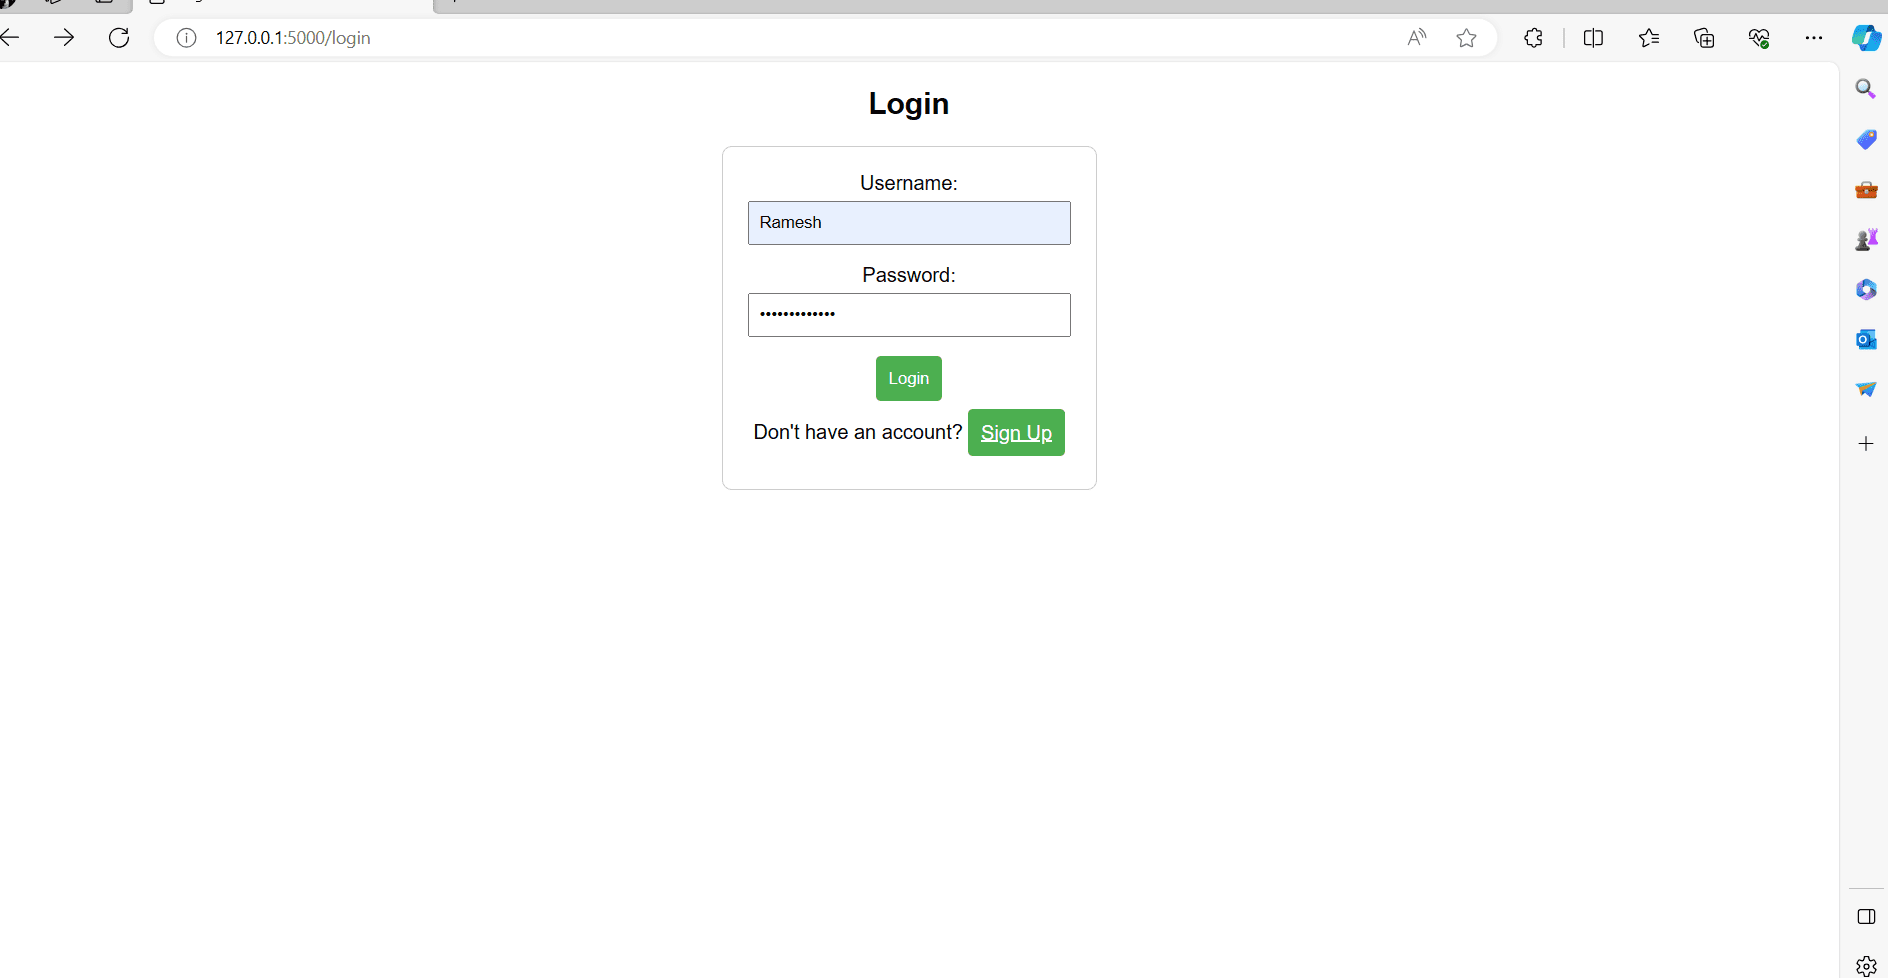

After login user get authenticated and redirect to university page
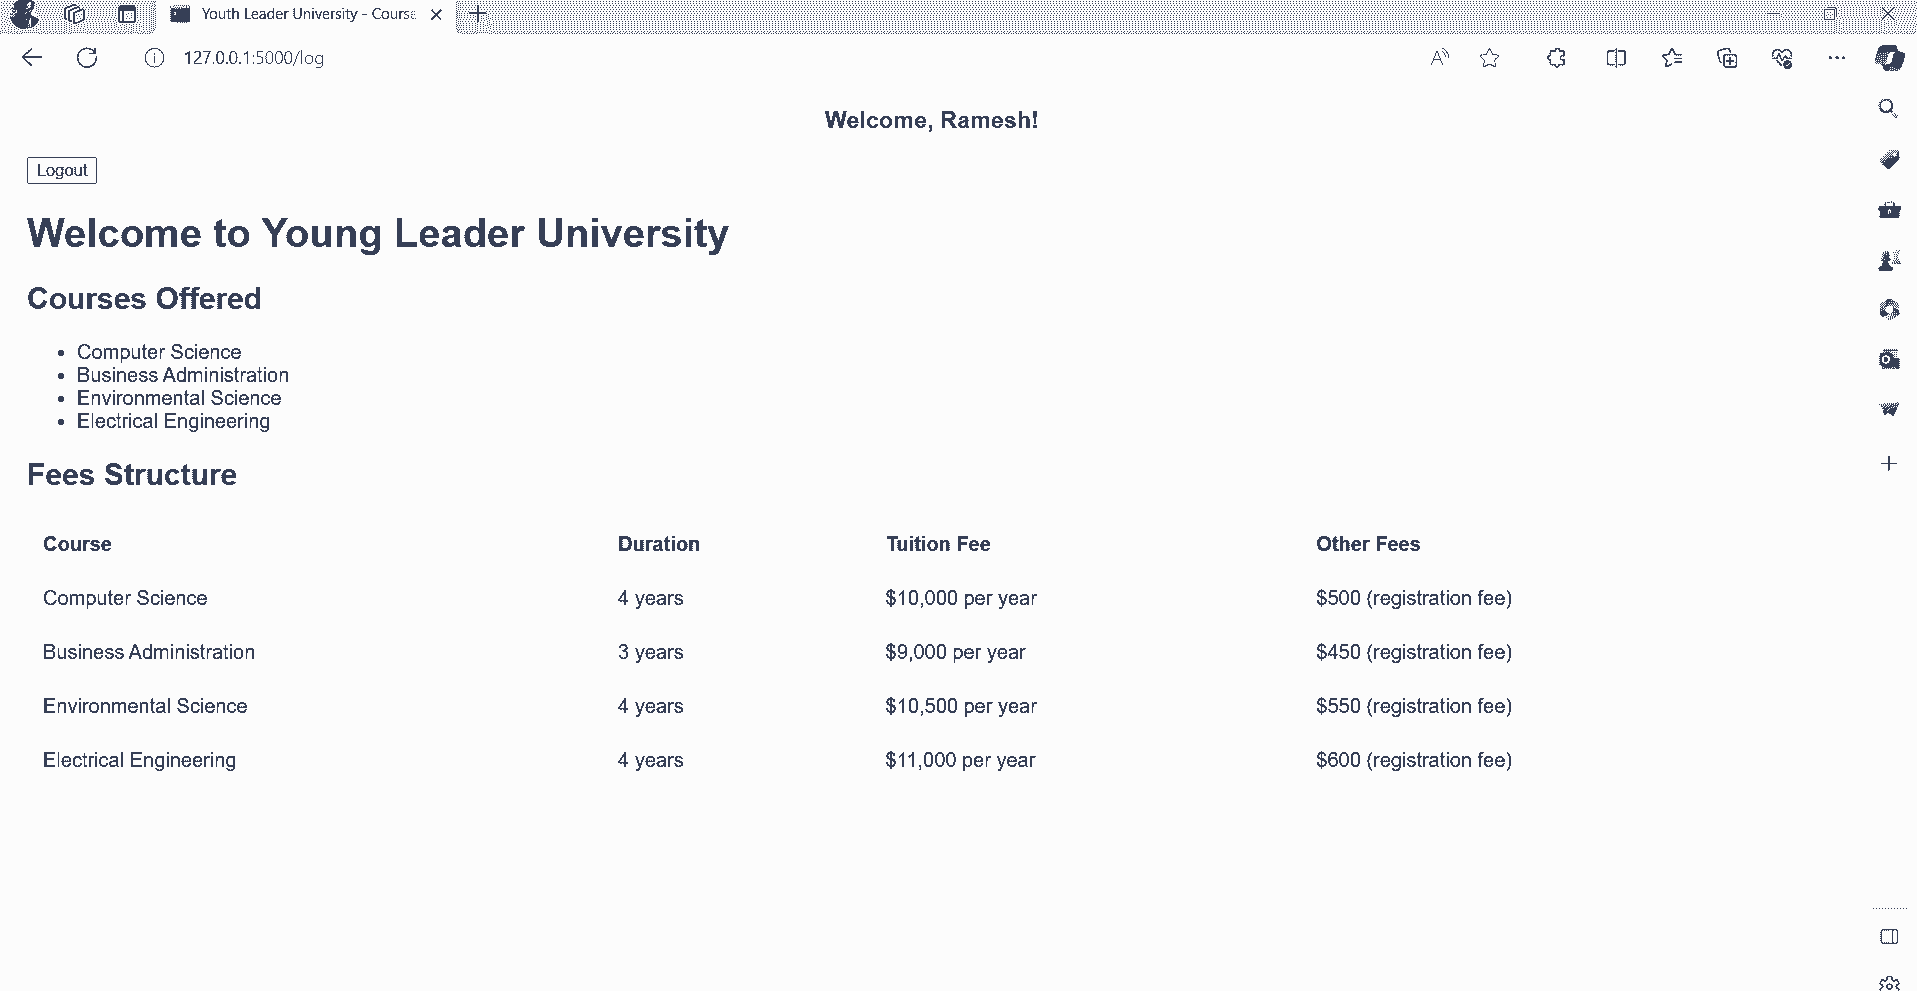

In [ ]:
#9. Create a RESTful API using Flask to perform CRUD operations on resources like books or movies.
from flask import Flask, render_template, request, g ,session    #g stand or global object to store data for lifetime of a request
import sqlite3

app = Flask(__name__)
app.config['DATABASE'] = 'book.db'
app.secret_key = 'Qwerty'

def get_db():#get_db() is a function that is responsible for getting the SQLite database connection within the context of a request
    db = getattr(g, '_database', None)        #getattr(g, '_database', None): This line attempts to get the value of the attribute 
    if db is None:                                        #named _database from the g object. The getattr function is used here. 
        db = g._database = sqlite3.connect(app.config['DATABASE'])          #If the attribute is not found, it returns None.
    return db

@app.teardown_appcontext     #The provided code is a Flask decorator @app.teardown_appcontext. In Flask, this decorator is used to
def close_connection(exception): # register a function that will be called when the application context is popped, which typically 
    db = getattr(g, '_database', None) #happens at the end of a request. In this case, the function is named close_connection.
    if db is not None:                  #he function will be called regardless of whether an exception occurred.
        db.close()

@app.route('/home', methods=['GET', 'POST'])
def home():
    return render_template('book.html')

@app.route('/insert', methods=['POST'])
def insert():
    name = request.form['title']
    author = request.form['author']
    
    # Use placeholders to prevent SQL injection
    query = 'INSERT INTO Book (Title, Author_Name) VALUES (?, ?)'
    get_db().execute(query, (name, author))
    get_db().commit()
    show = ' Data inserted successfully'
    session['show'] = show
    return render_template('show.html',show = show)

@app.route('/disp', methods=['GET', 'POST'])
def disp():
    cursor = get_db().execute('SELECT * FROM Book;')
    books = cursor.fetchall()
    return render_template('display_books.html', books=books)

@app.route('/delete')
def delete_info():
    cursor = get_db().execute('SELECT * FROM Book;')
    books = cursor.fetchall()
    return render_template('delete_info.html', books=books)

@app.route('/update')
def update_info1():
    cursor = get_db().execute('SELECT * FROM Book;')
    books = cursor.fetchall()
    return render_template('update_info.html', books=books)

@app.route('/del',methods = ['GET','POST'])
def delete_info1():
    name = request.form['title']
    author = request.form['author']
    query = get_db().execute('DELETE FROM Book WHERE Title = ? and Author_Name = ?;  ')
    get_db().execute(query, (name, author))
    get_db().commit()
    show = ' Data Deleted successfully'
    session['show'] = show
    return render_template('show.html',show = show)

@app.route('/up',methods = ['GET','POST'])
def update_info():
    name = request.form['title']
    author = request.form['author']
    new_title = request.form['new_title']
    new_author = request.form['new_author']
    query = 'UPDATE Book SET Title = ?, Author_Name = ? WHERE Author_Name = ? and Title = ?; '
    get_db().execute(query, (new_title, new_author, author, name))
    get_db().commit()
    show = 'Data updated successfully'
    session['show'] = show
    return render_template('show.html', show=show)

if __name__ == '__main__':
    app.run(debug=True)
    
    
    
    
''' *******show.html Code is **************************
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Button Example</title>
</head>
<body>

<h1>{{ show }}</h1>

<!-- Button to return to home page -->
<button onclick="returnToHomePage()">Return to form to add further data</button>

<!-- Button to delete from the table -->
<button onclick="delete_info()">Delete from the table</button>

<!-- Button to update information information -->
<button onclick="Update_info()">Update Information</button>

<!-- Button to display all information -->
<button onclick="displayAllInfo()">Display All Information</button>

<script>
    function returnToHomePage() {
        // Redirect to the home page (replace 'home.html' with the actual home page URL)
        alert('Add further data');
        window.location.href = '/book.html';
    }
    function delete_info() {
        // Redirect to the home page (replace 'home.html' with the actual home page URL)
        alert('Delete Information');
        window.location.href = '/delete';
    }
    function Update_info() {
        // Redirect to the home page (replace 'home.html' with the actual home page URL)
        alert('Update Information');
        window.location.href = '/update';
    }

    function displayAllInfo() {
        // You can use JavaScript to perform an action, such as displaying all information
        // Example: Call a function or show a modal with all information
        alert('Displaying all information');
        window.location.href = '/disp';
    }
</script>

</body>
</html>

'''





Table before operation
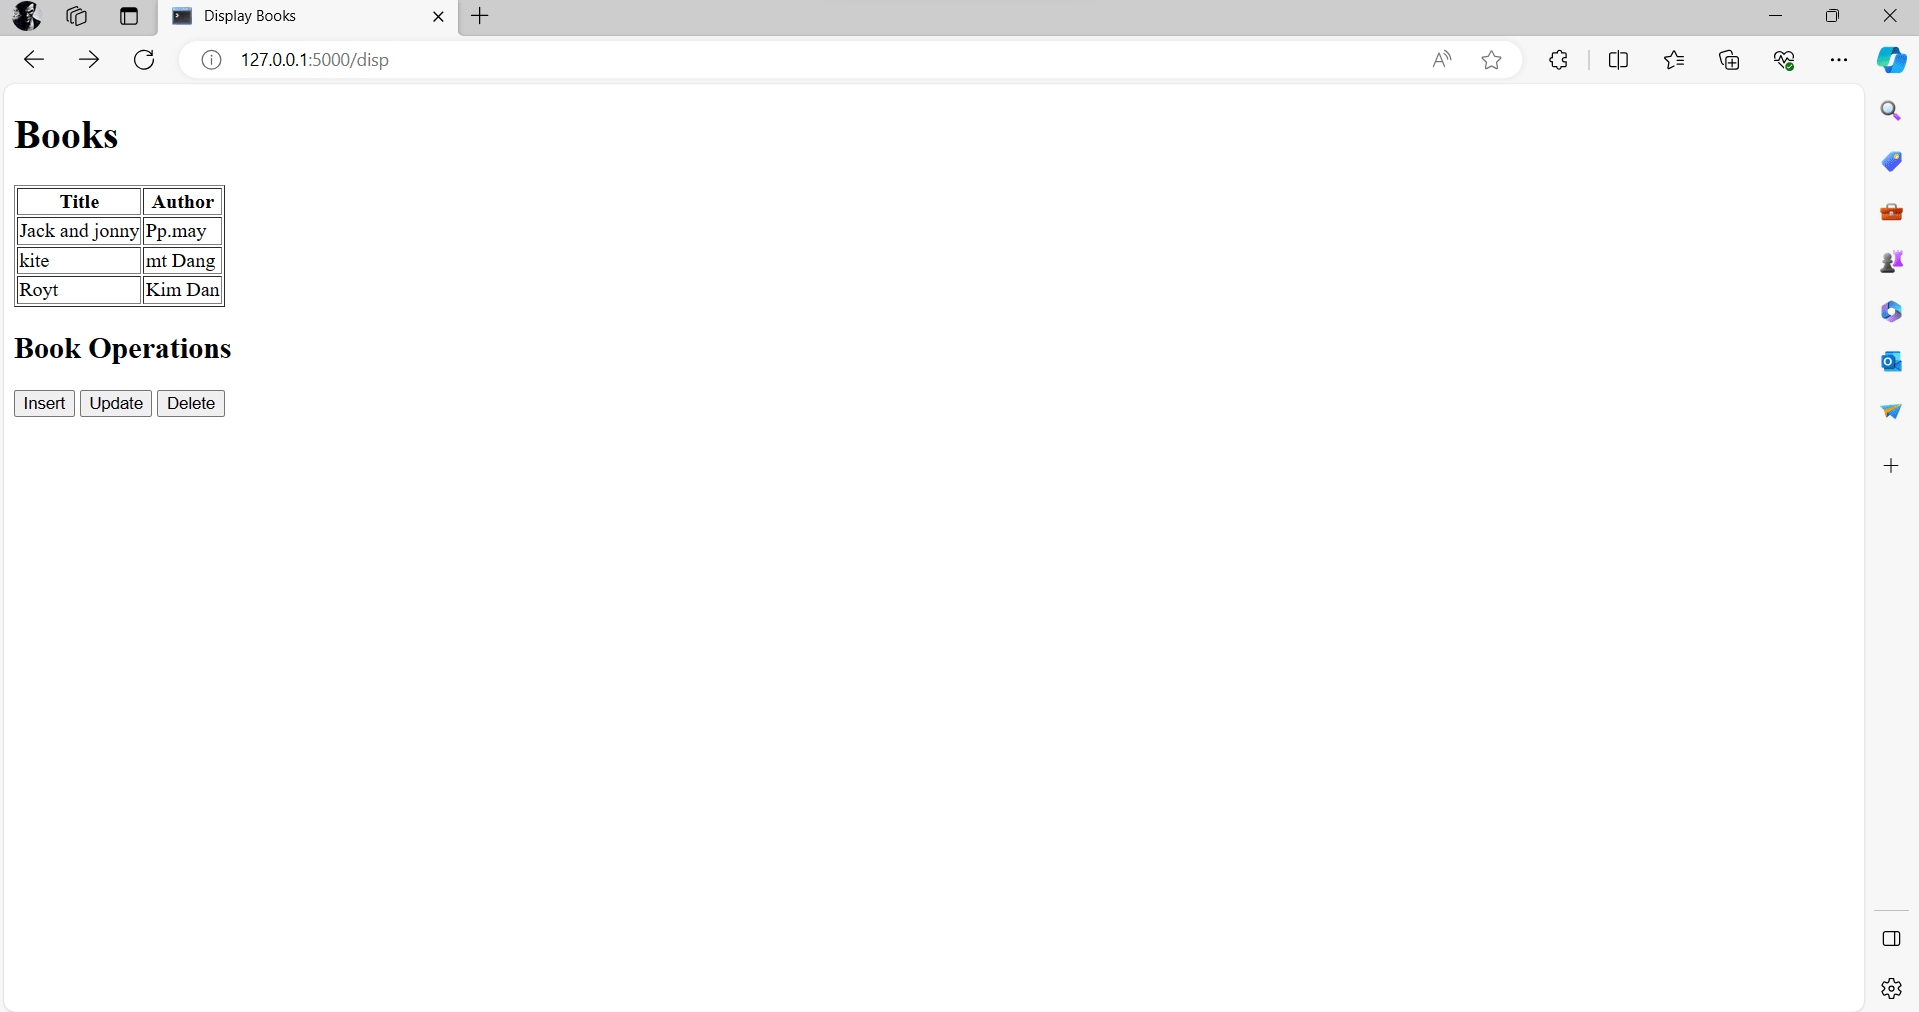

Udate page
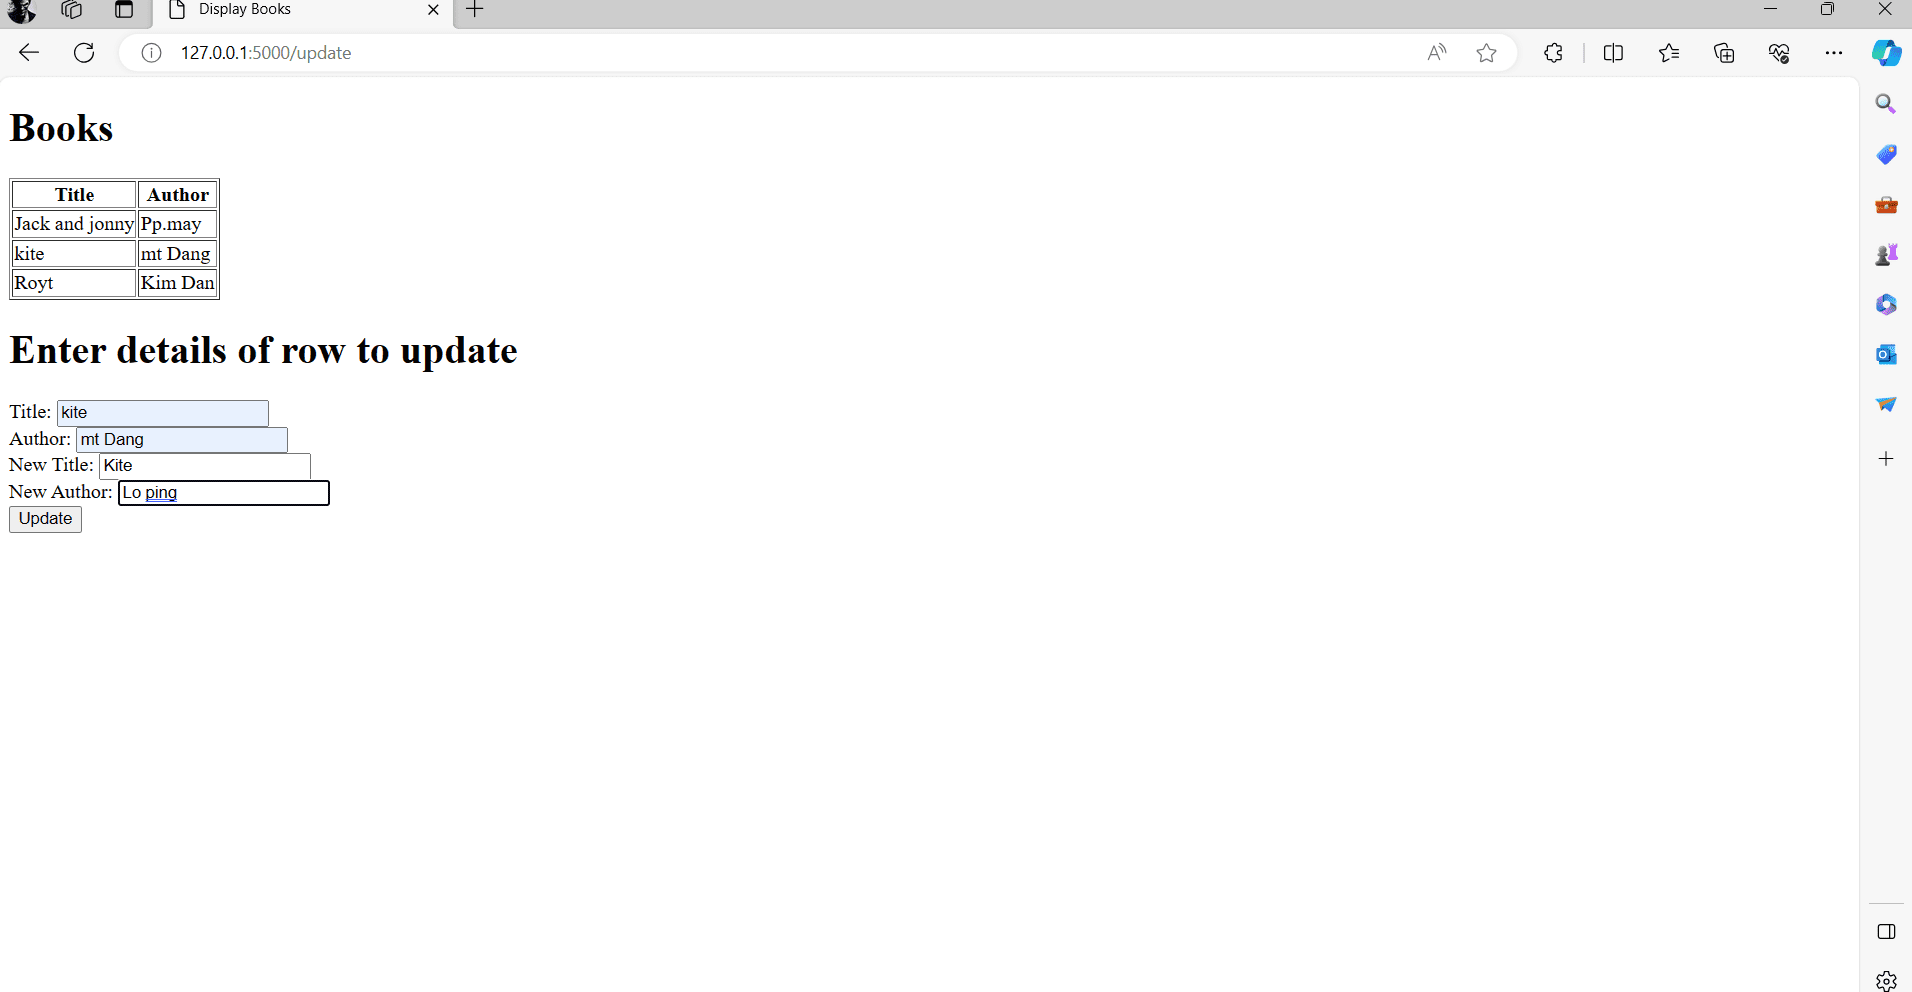

After update
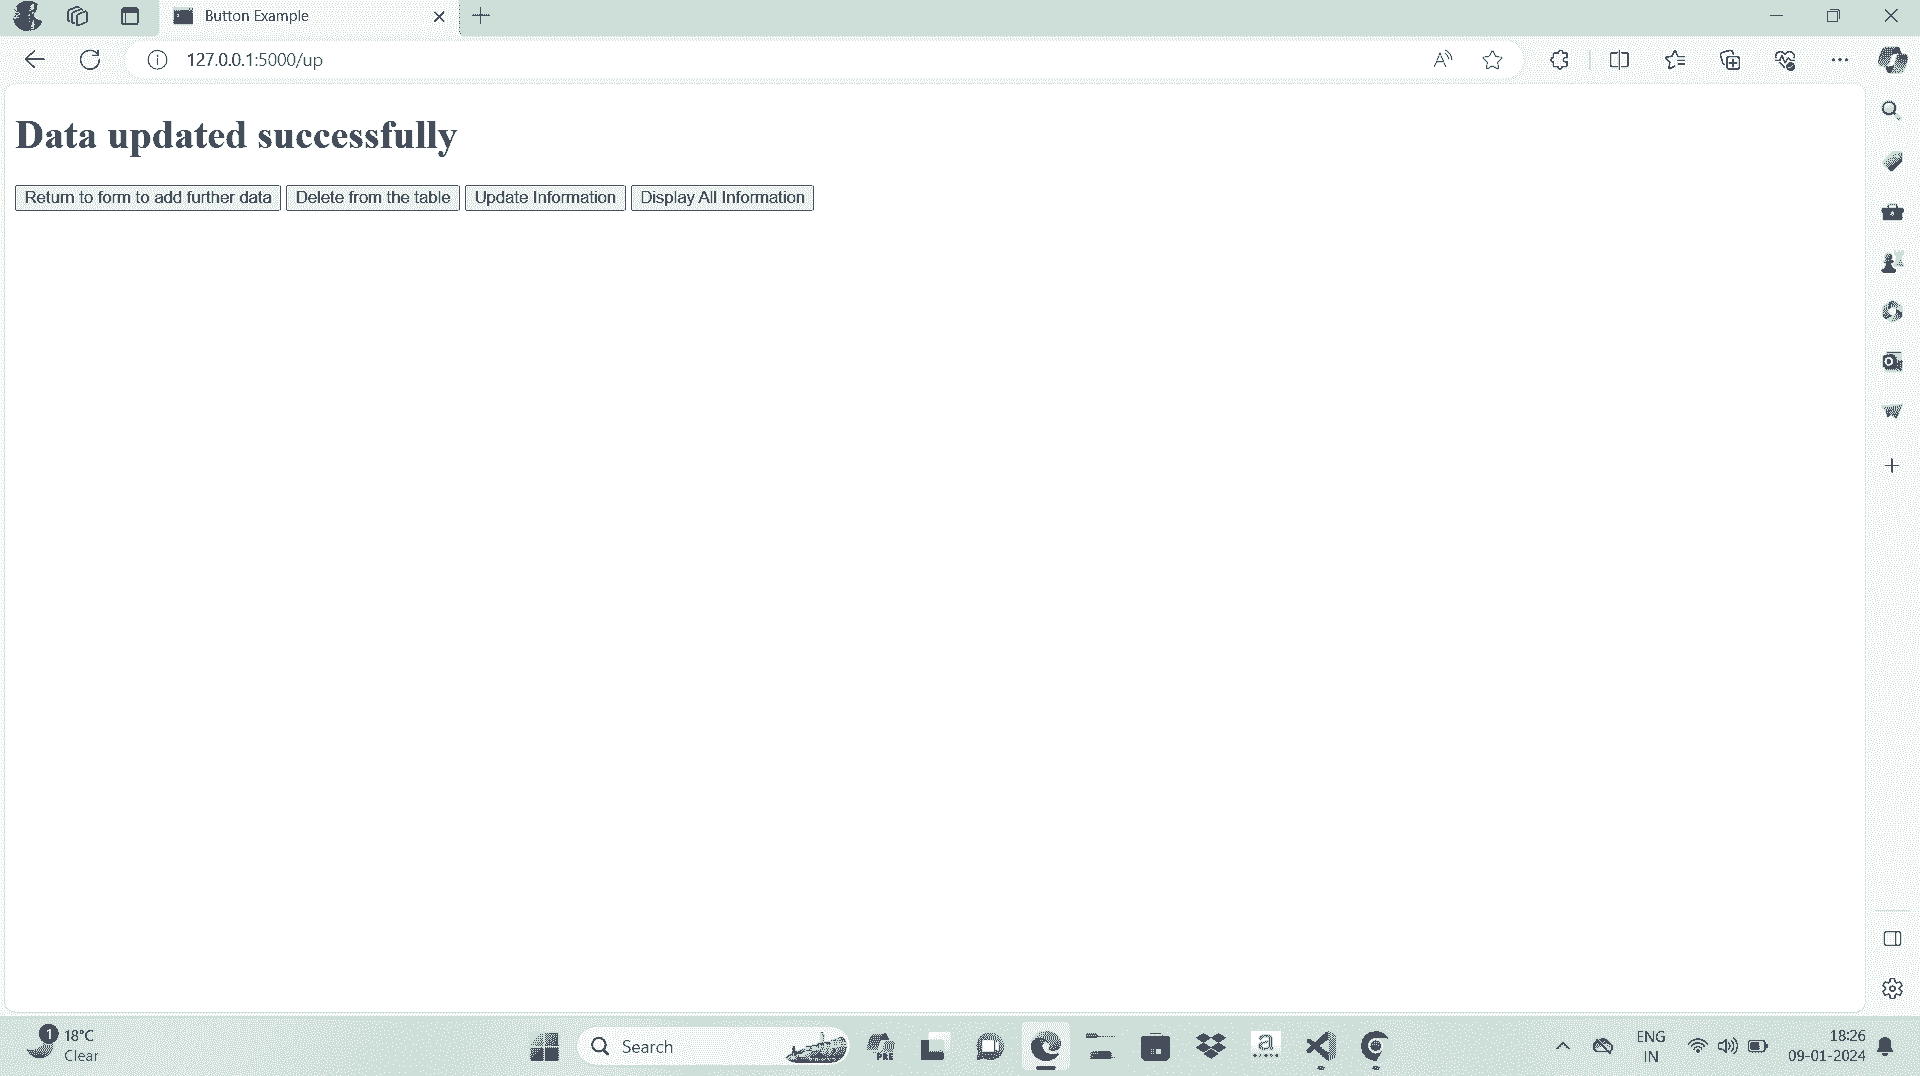

After updation table is 
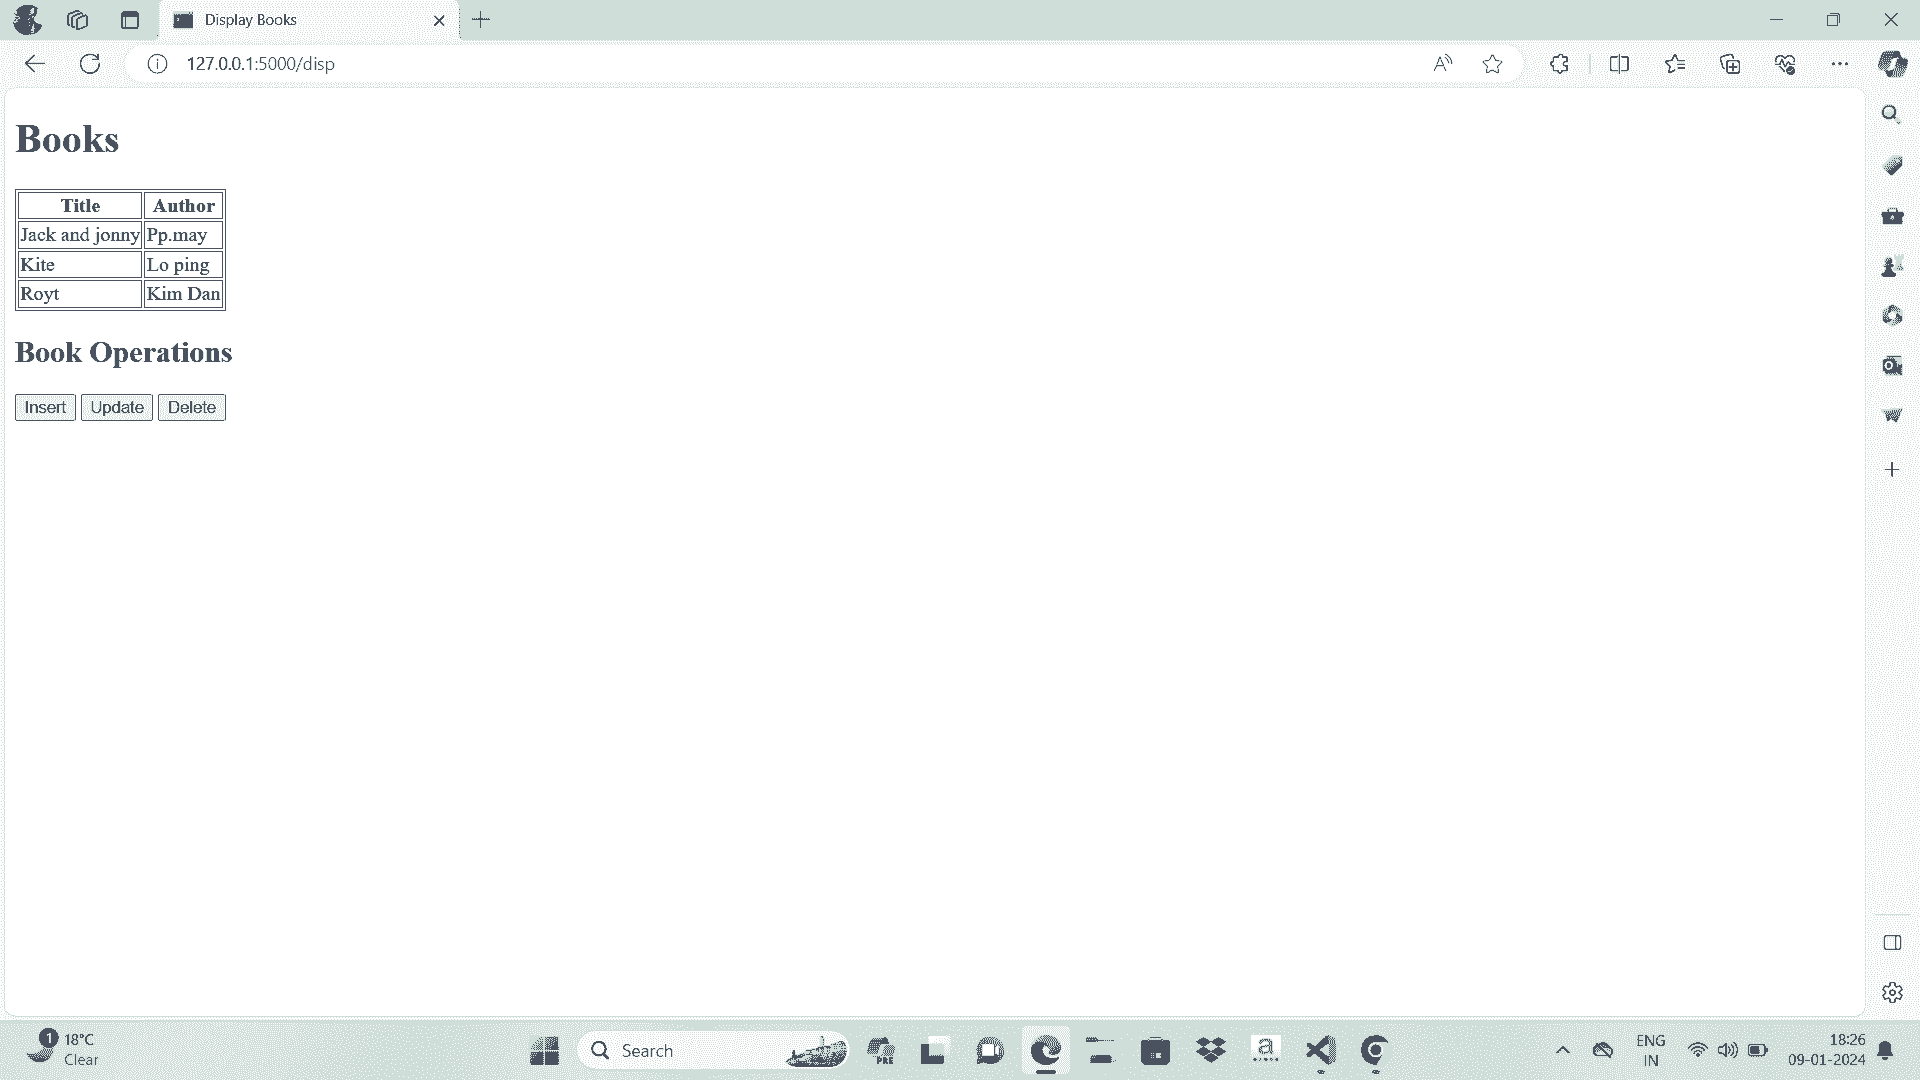

In [ ]:
#10. Design a Flask app with proper error handling for 404 and 500 errors.
from flask import Flask, render_template

app = Flask(__name__)

# Custom error handler for 404 Not Found
@app.errorhandler(404)
def page_not_found(error):
    return render_template('404.html'), 404

# Custom error handler for 500 Internal Server Error
@app.errorhandler(500)
def internal_server_error(error):
    return render_template('500.html'), 500

# Route for the home page
@app.route('/')
def home():
    return render_template('index.html')

# Route to simulate a 404 error
@app.route('/not_found')
def simulate_not_found():
    # Force a 404 error by trying to access a non-existing endpoint
    return render_template('not_found.html'), 404

# Route to simulate a 500 error
@app.route('/internal_error')
def simulate_internal_error():
    # Force a 500 error by raising an exception
    raise Exception("This is a simulated internal server error.")

if __name__ == '__main__':
    app.run(debug=True)


Real-time Development:

In [ ]:
#11. Create a real-time chat application using Flask-SocketIO.
#first install -->pip install flask-socketio
from flask import Flask, render_template, request, session, redirect, url_for  #pip install flask-socketio
from flask_socketio import join_room, leave_room, send, SocketIO
import random
from string import ascii_uppercase

app = Flask(__name__)
app.config["SECRET_KEY"] = "hjhjsdahhds"
socketio = SocketIO(app)

rooms = {}

def generate_unique_code(length):
    while True:
        code = ""
        for _ in range(length):
            code += random.choice(ascii_uppercase)
        
        if code not in rooms:
            break
    
    return code

@app.route("/", methods=["POST", "GET"])
def home():
    session.clear()
    if request.method == "POST":
        name = request.form.get("name")
        code = request.form.get("code")
        join = request.form.get("join", False)
        create = request.form.get("create", False)

        if not name:
            return render_template("live_chat_home.html", error="Please enter a name.", code=code, name=name)

        if join != False and not code:
            return render_template("live_chat_home.html", error="Please enter a room code.", code=code, name=name)
        
        room = code
        if create != False:
            room = generate_unique_code(4)
            rooms[room] = {"members": 0, "messages": []}
        elif code not in rooms:
            return render_template("live_chat_home.html", error="Room does not exist.", code=code, name=name)
        
        session["room"] = room
        session["name"] = name
        return redirect(url_for("room"))

    return render_template("live_chat_home.html")

@app.route("/room")
def room():
    room = session.get("room")
    if room is None or session.get("name") is None or room not in rooms:
        return redirect(url_for("home"))

    return render_template("live_chat_room.html", code=room, messages=rooms[room]["messages"])

@socketio.on("message")
def message(data):
    room = session.get("room")
    if room not in rooms:
        return 
    
    content = {
        "name": session.get("name"),
        "message": data["data"]
    }
    send(content, to=room)
    rooms[room]["messages"].append(content)
    print(f"{session.get('name')} said: {data['data']}")

@socketio.on("connect")
def connect(auth):
    room = session.get("room")
    name = session.get("name")
    if not room or not name:
        return
    if room not in rooms:
        leave_room(room)
        return
    
    join_room(room)
    send({"name": name, "message": "has entered the room"}, to=room)
    rooms[room]["members"] += 1
    print(f"{name} joined room {room}")

@socketio.on("disconnect")
def disconnect():
    room = session.get("room")
    name = session.get("name")
    leave_room(room)

    if room in rooms:
        rooms[room]["members"] -= 1
        if rooms[room]["members"] <= 0:
            del rooms[room]
    
    send({"name": name, "message": "has left the room"}, to=room)
    print(f"{name} has left the room {room}")

if __name__ == "__main__":
    socketio.run(app, debug=True)

Chat Room creating and joining
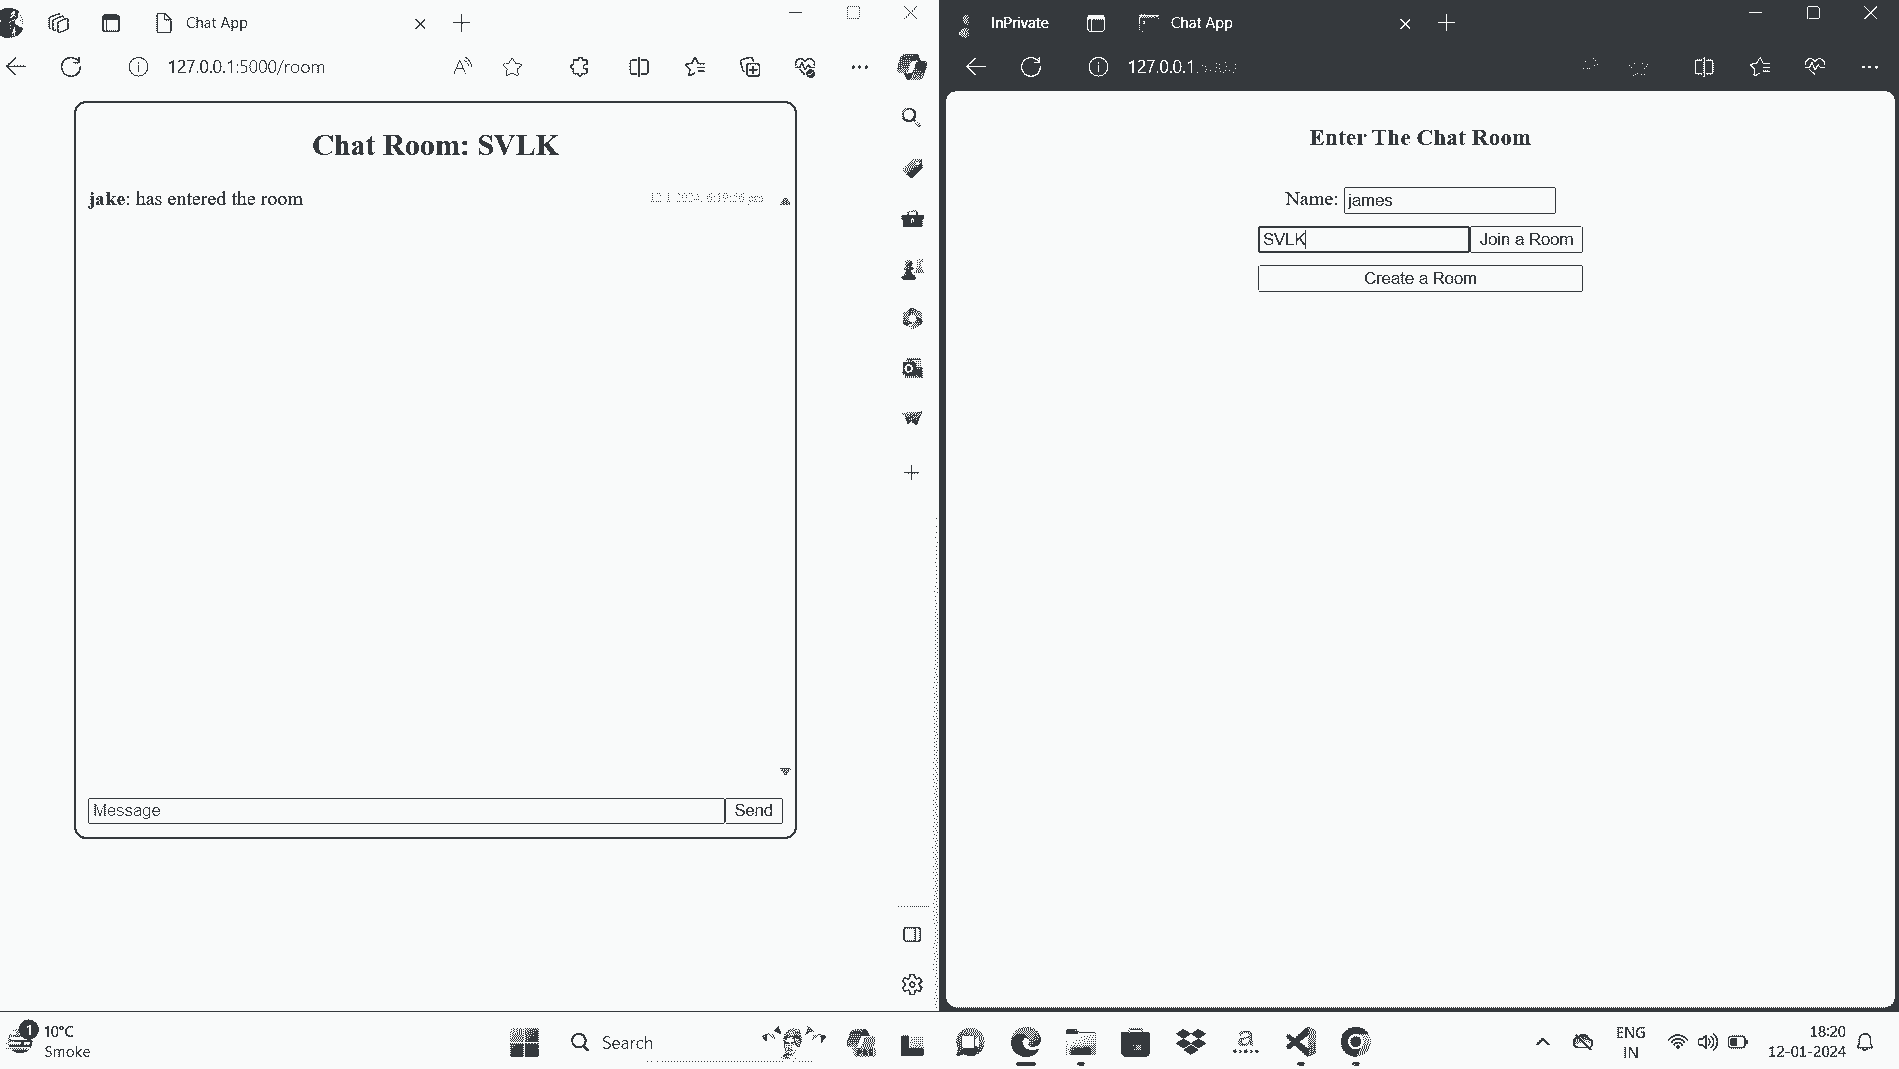

Inside the chat room
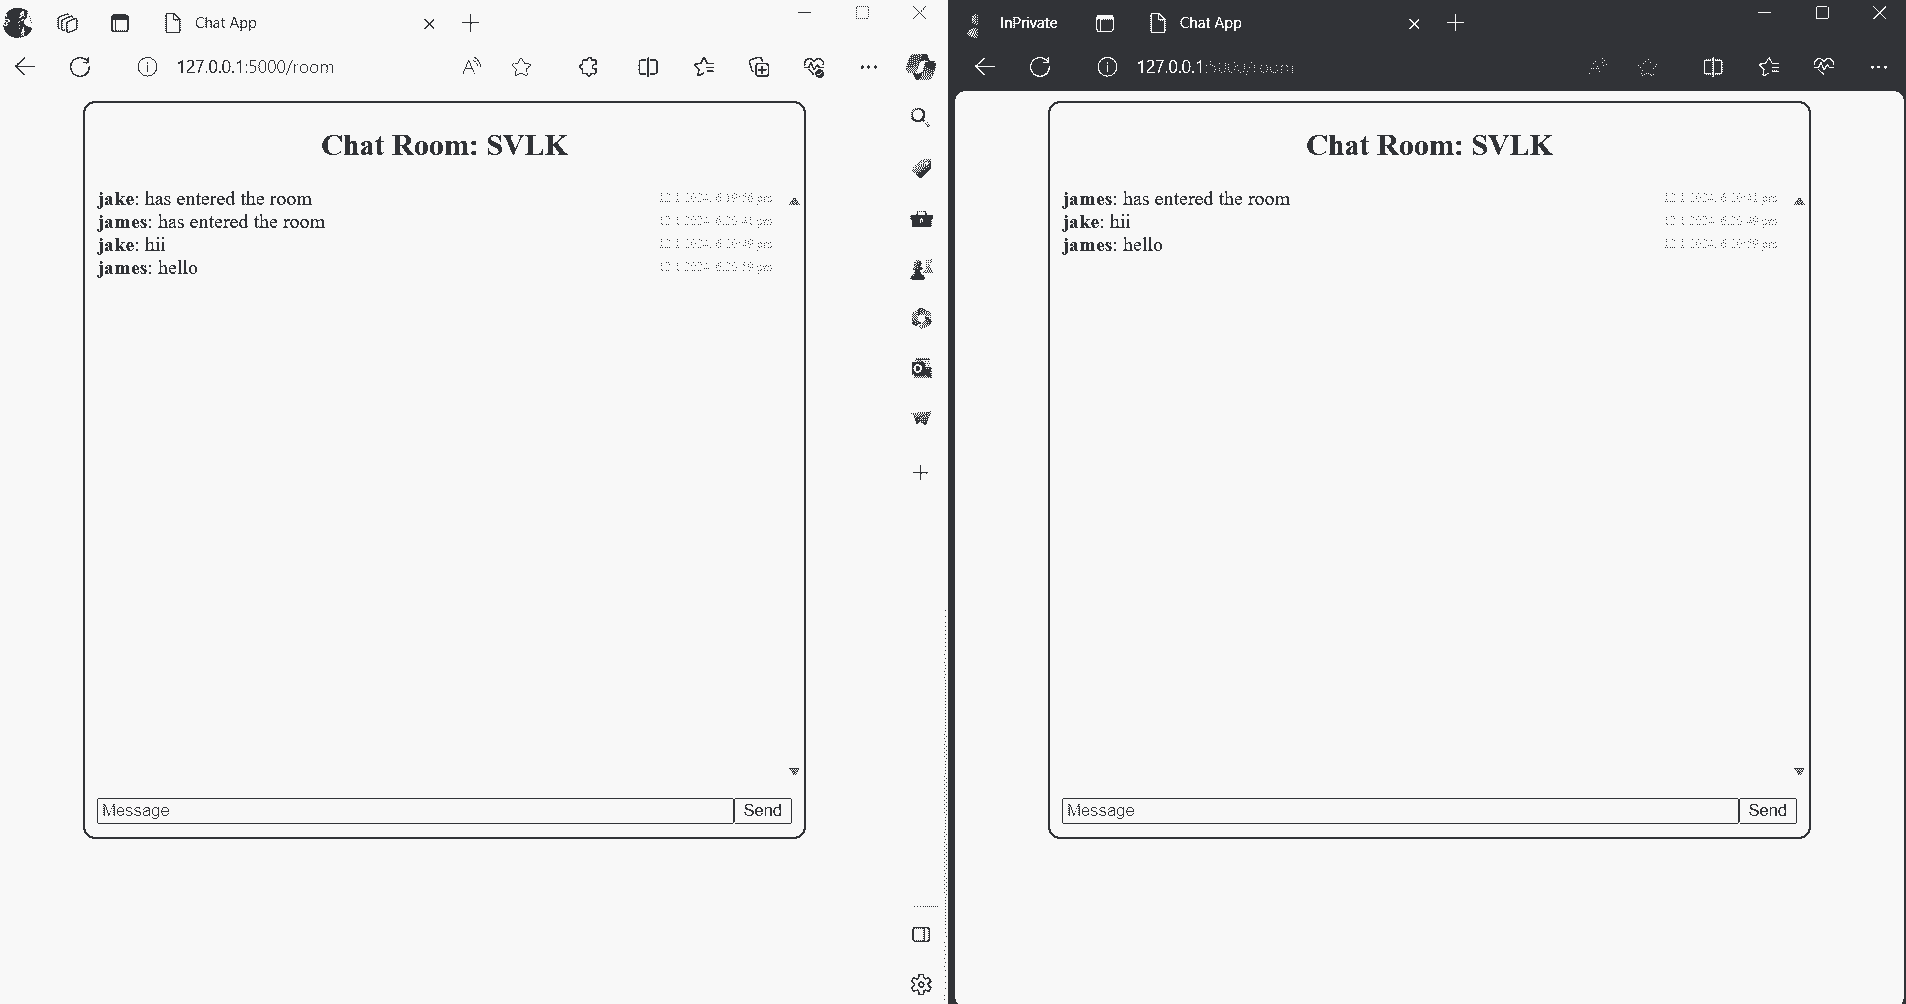


In [ ]:
#12. Build a Flask app that updates data in real-time using WebSocket connections.
'''this simple Flask app will updates data in real-time using WebSocket connections. In this
we'll create a counter that increments every second and broadcasts the updated count to all connected client'''
from flask import Flask, render_template
from flask_socketio import SocketIO, emit
import time
from threading import Thread

app = Flask(__name__)
app.config['SECRET_KEY'] = 'fgfsd'
socketio = SocketIO(app)

# Counter variable
counter = 0

# Function to increment the counter and emit the updated count
def background_task():
    global counter
    while True:
        time.sleep(1)
        counter += 1
        socketio.emit('update_count', {'count': counter}, namespace='/test')

# Route for the main page
@app.route('/')
def index():
    return render_template('count.html')

# Socket.IO connection event
@socketio.on('connect', namespace='/test')
def handle_connect():
    print('Client connected')
    emit('update_count', {'count': counter})

# Start the background task on app startup
if __name__ == '__main__':
    thread = Thread(target=background_task)
    thread.daemon = True
    thread.start()

    socketio.run(app)



In [ ]:
#13. Implement notifications in a Flask app using websockets to notify users of updates.
from flask import Flask, render_template
from flask_socketio import SocketIO, emit
import time
from threading import Thread

app = Flask(__name__)
app.config['SECRET_KEY'] = 'fgfsd'
socketio = SocketIO(app)

# Counter variable
counter = 0

# Function to increment the counter and emit the updated count
def background_task():
    global counter
    while True:
        time.sleep(1)
        counter += 1
        socketio.emit('update_count', {'count': counter}, namespace='/test')

# Route for the main page
@app.route('/')
def index():
    return render_template('count.html')

# Socket.IO connection event
@socketio.on('connect', namespace='/test')
def handle_connect():
    print('Client connected')
    emit('update_count', {'count': counter})

# Start the background task on app startup
if __name__ == '__main__':
    thread = Thread(target=background_task)
    thread.daemon = True
    thread.start()

    socketio.run(app)

